# **StomataPy Colab demo**

Autor: Hongyuan from Santelia Lab at ETH Zurich

Contact: hongyuan.zhang@usys.ethz.ch

## 1. You need to select a runtime with GPU such as A100 (pro+) or T4 (free)

On the top right -> click the dropdown -> change runtime type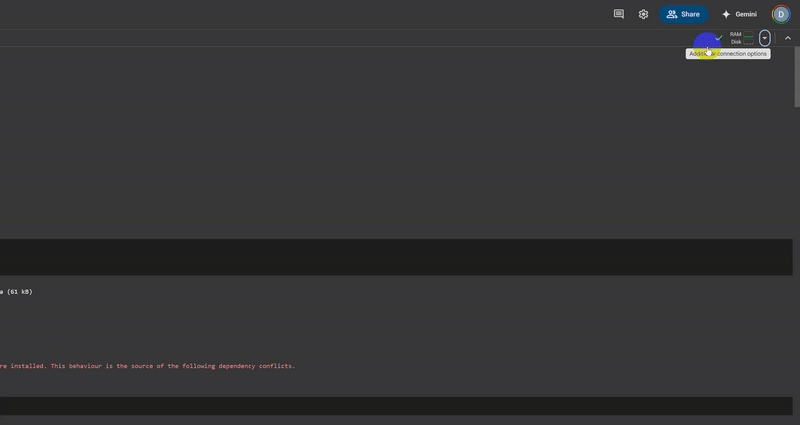

## 2. Add model access key

Add the model secret key, named it as hf_token, on the left panel
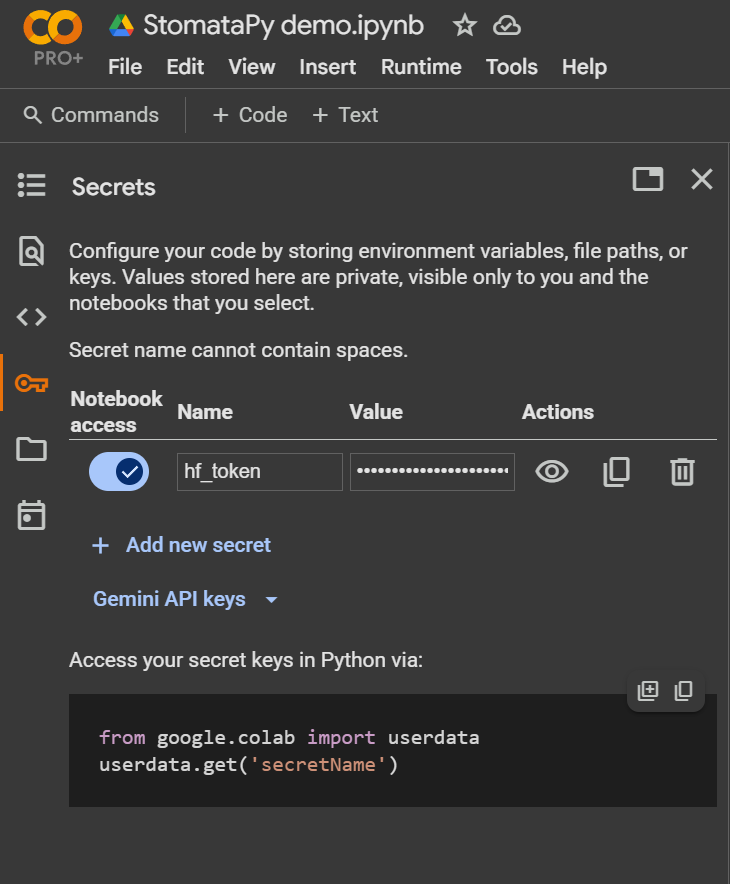

## 2. After this block restart the session

In [1]:
!pip install numpy==1.26.4 --force-reinstall
import numpy as np
print(f"Numpy version: {np.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Numpy version: 2.0.2


## 3. **On the top panel -> Runtime -> Restart session**
run the next block until you see Numpy version: 1.26.4

In [1]:
import numpy as np
print(f"Numpy version: {np.__version__}")

Numpy version: 1.26.4


## 4. Install StomataPy

In [2]:
# First restart runtime to clear preloaded numpy 2.x, then run this:

import os

# from google.colab import drive; drive.mount('/content/drive')

# %cd /content/drive/MyDrive/

!rm -rf StomataPy
!git clone --recursive https://github.com/Alias-z/StomataPy.git

%cd StomataPy

# Install PyTorch that's compatible with numpy 1.26.4
!pip install torch==2.1.1+cu118 torchvision==0.16.1+cu118 torchaudio==2.1.1+cu118 --extra-index-url https://download.pytorch.org/whl/cu118

# Install other dependencies
!pip install openmim==0.3.8 xformers==0.0.23 transformers==4.41.2 fairscale pycocotools
!pip install jupyter more-itertools openpyxl scikit-image ftfy regex sahi

# Install MM dependencies with mim
!mim install mmengine==0.10.4 mmcv==2.1.0 mmpretrain

# Install your customized submodules
!pip install -e ./sam-hq ./mmsegmentation ./mmdetection


from stomatapy.models.openmmlab import OpenMMlab
from stomatapy.core.core import get_paths
%cd ..

Cloning into 'StomataPy'...
remote: Enumerating objects: 718, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 718 (delta 22), reused 46 (delta 11), pack-reused 653 (from 1)
Receiving objects: 100% (718/718), 177.01 MiB | 47.18 MiB/s, done.
Resolving deltas: 100% (418/418), done.
Submodule 'mmdetection' (https://github.com/Alias-z/mmdetection.git) registered for path 'mmdetection'
Submodule 'mmsegmentation' (https://github.com/Alias-z/mmsegmentation.git) registered for path 'mmsegmentation'
Submodule 'sahi' (https://github.com/Alias-z/sahi.git) registered for path 'sahi'
Submodule 'sam-hq' (https://github.com/Alias-z/sam-hq.git) registered for path 'sam-hq'
Cloning into '/content/StomataPy/mmdetection'...
remote: Enumerating objects: 36812, done.        
remote: Counting objects: 100% (10/10), done.        
remote: Compressing objects: 100% (6/6), done.        
remote: Total 36812 (delta 8), reused 4 (delta 4), pack-reus

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


/content


## 5. Download models

In [3]:
from google.colab import userdata
hf_token = userdata.get('hf_token')
!export HF_TOKEN="$hf_token"
!HF_HUB_ETAG_TIMEOUT=50000
!huggingface-cli login --token "$hf_token"
!huggingface-cli download aliasz/StomataPy400K-Models --local-dir ./Checkpoints --force-download

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `StomataPy400K-Models` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `StomataPy400K-Models`
Fetching 6 files:   0% 0/6 [00:00<?, ?it/s]Downloading 'README.md' to 'Checkpoints/.cache/huggingface/download/Xn7B-BWUGOee2Y6hCZtEhtFu4BE=.ffa3e91e33d266a7504d7a0233c43ffe838a3234.incomplete'

(…)et_rein_dinov2_mask2former_evensample.py: 100% 23.4k/23.4k [00:00<00:00, 56.4MB/s]
Download complete. Moving file to Checkpoints/StomataPy400K_denisty_24185/det_rein_dinov2_mask2former_evensample.py

.gitattributes: 100% 1.52k/1.52k [00:00<00:00, 15.8MB/s]
Download complete. Moving file to Checkpoints/.gitattribu

## 5. Set you image location and hit  run!

In [4]:
#@title Model Settings

#@markdown  **Mandatory parameters**
input_dir = 'StomataPy/asserts/sample_images' #@param {type: 'string'}

#@markdown  **Optional (Do not modify if you are not sure)**

use_sahi = True #@param {type:'boolean'}
stack_input = False #@param {type:'boolean'}
check_straight_edges = False #@param {type:'boolean'}
straight_line_threshold = 100 #@param {type:'slider', min:0, max:500, step:10}
detector_threshold = 0.9 #@param {type:'slider', min:0, max:1, step:0.1}


image_types = ['.jpg', '.jpeg', '.png', '.tif', '.tiff', '.bmp', '.gif', '.ico', '.jfif', '.webp']
video_types = ['.avi', '.mp4', '.mov', '.wmv']

image_paths = [path for ext in image_types + video_types for path in get_paths(input_dir, ext)]
json_paths = [os.path.splitext(image_path)[0] + '.json' for image_path in image_paths]

models = OpenMMlab(
            detector_config_path='StomataPy/train/config/det_rein_dinov2_mask2former.py',
            detector_weight_path='Checkpoints/StomataPy400K_denisty_24185/dinov2_detector.pth',
            detector_threshold=0.9,
            segmentor_config_path='Checkpoints/StomataPy400K_aperture_512/seg_rein_dinov2_mask2former.py',
            segmentor_weight_path='Checkpoints/StomataPy400K_aperture_512/dinov2_segmentor.pth',
            use_sahi=use_sahi,
            stack_input=stack_input,
            check_straight_edges=check_straight_edges,
            straight_line_threshold=straight_line_threshold
        )

Loads checkpoint by local backend from path: Checkpoints/StomataPy400K_aperture_512/dinov2_segmentor.pth


### 5.1 Detect stomata

Loads checkpoint by local backend from path: Checkpoints/StomataPy400K_denisty_24185/dinov2_detector.pth
05/30 14:11:24 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


100%|██████████| 9/9 [00:57<00:00,  6.44s/it]


Converting predictions to ISAT JSON files...


100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


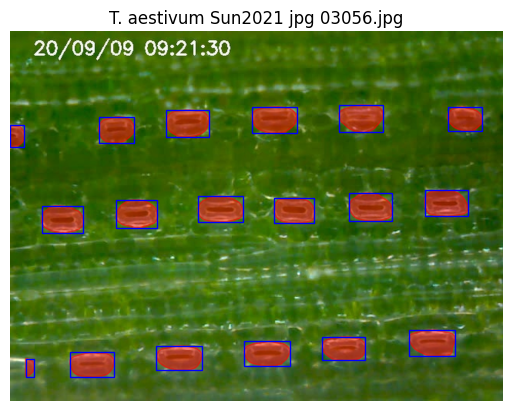

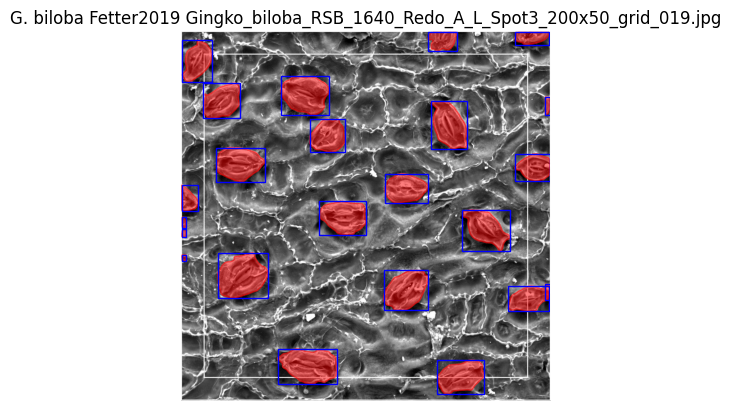

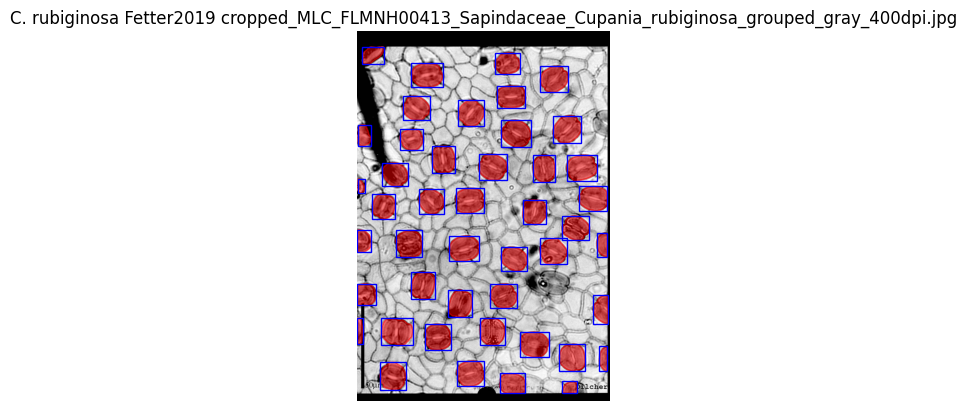

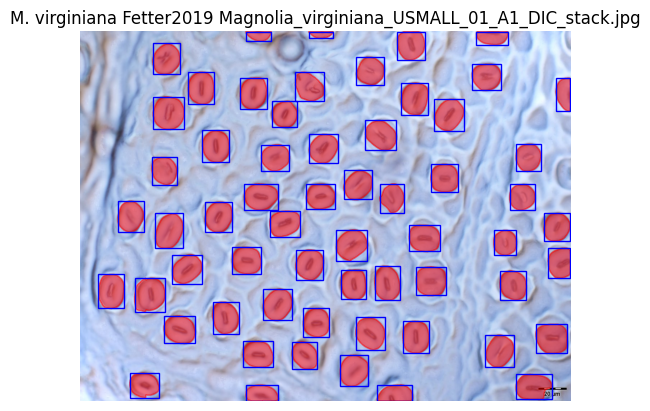

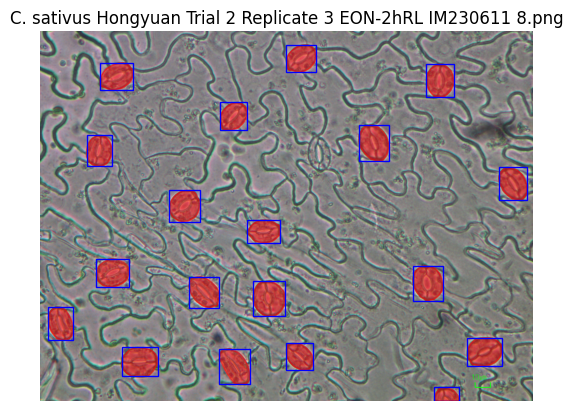

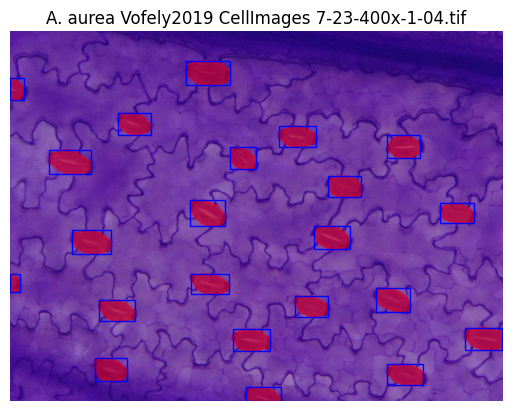

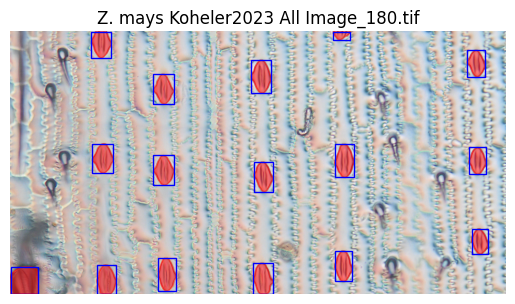

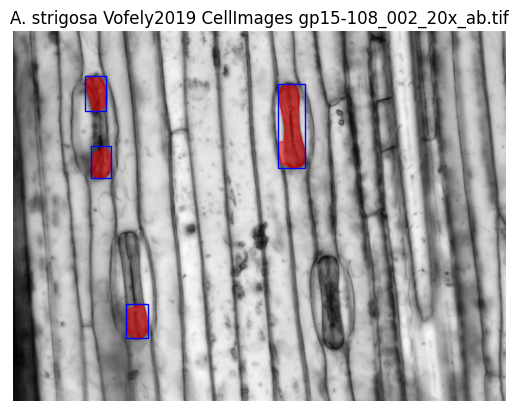

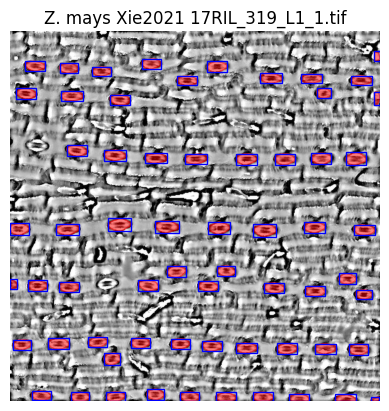

In [5]:
_ = models.detect_cell(image_paths, if_visualize=True, if_auto_label=True)

### 5.2 Segment sub stomata classes

  0%|          | 0/9 [00:00<?, ?it/s]

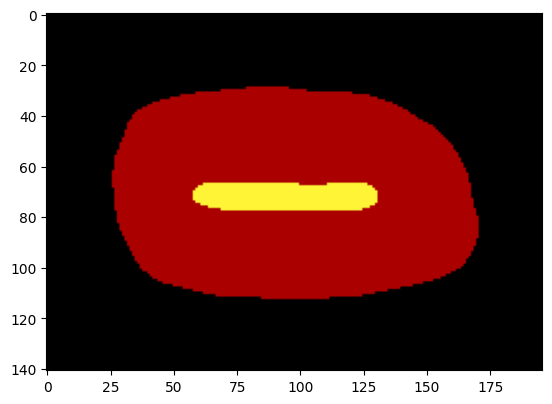

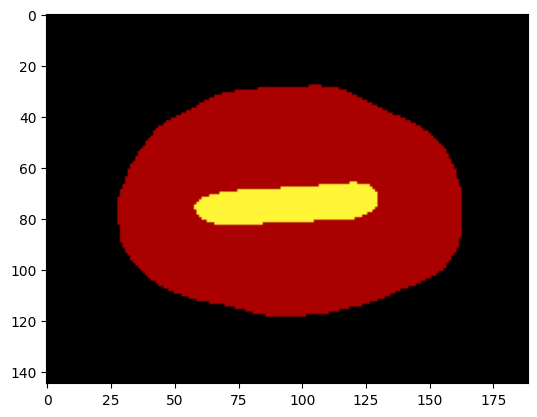

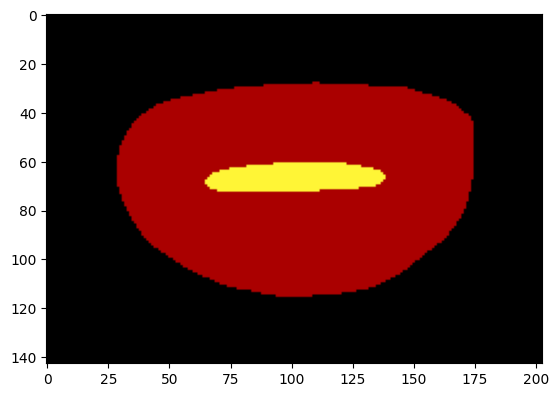

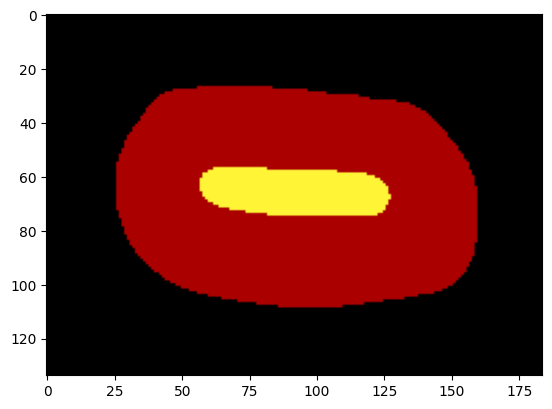

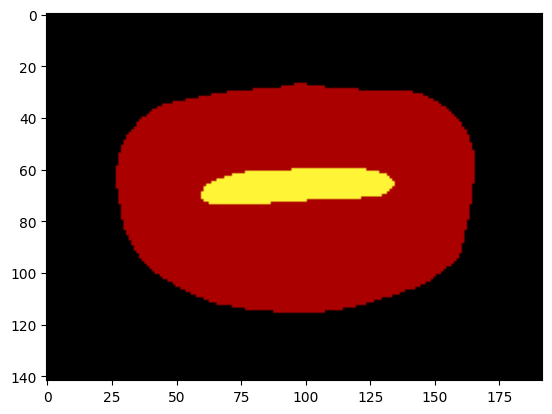

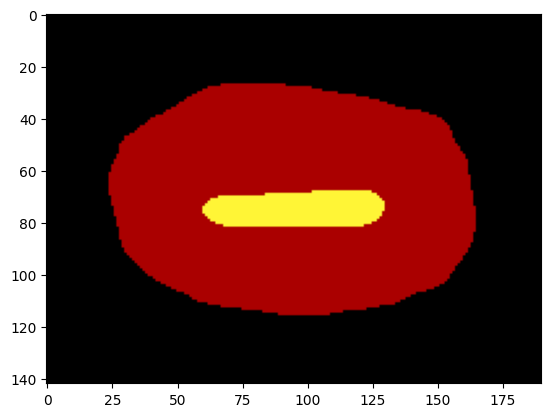

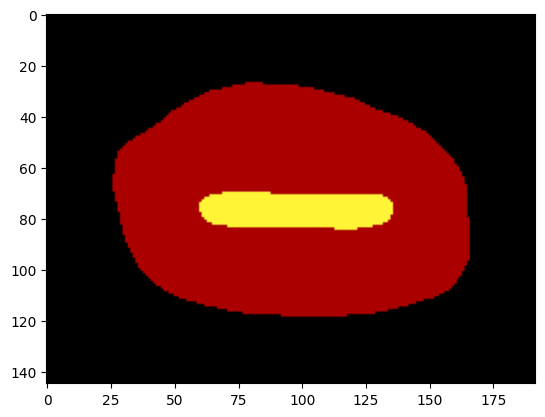

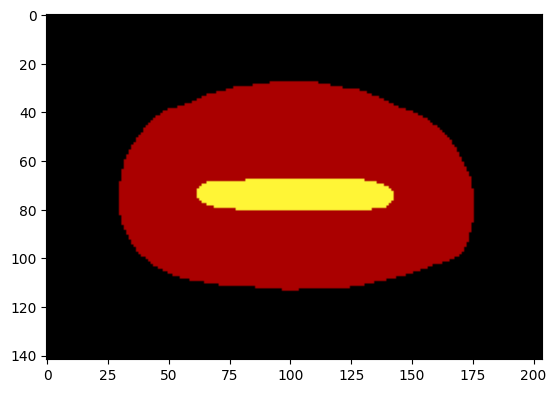

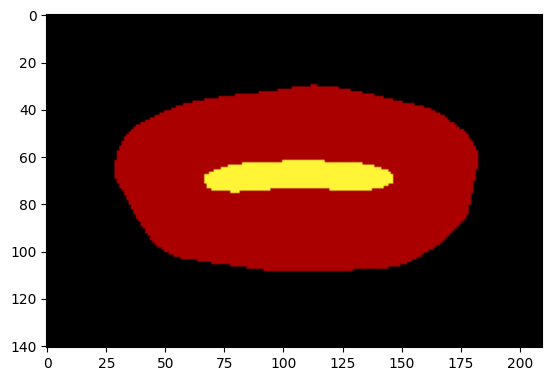

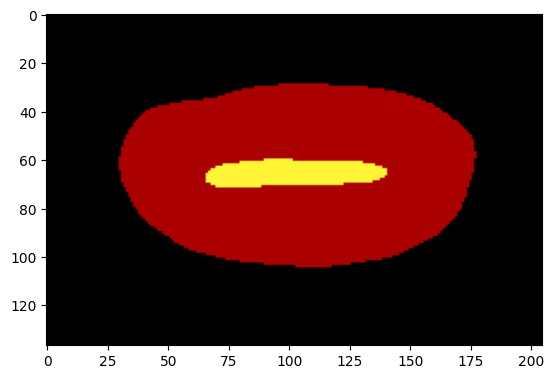

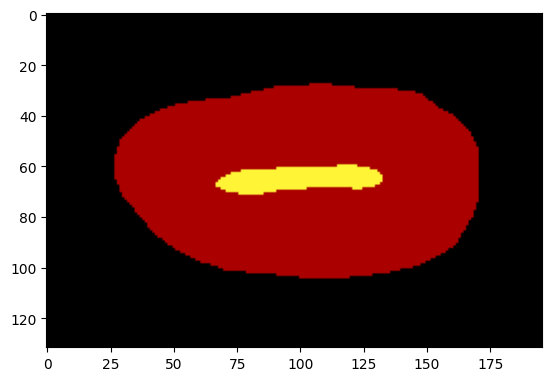

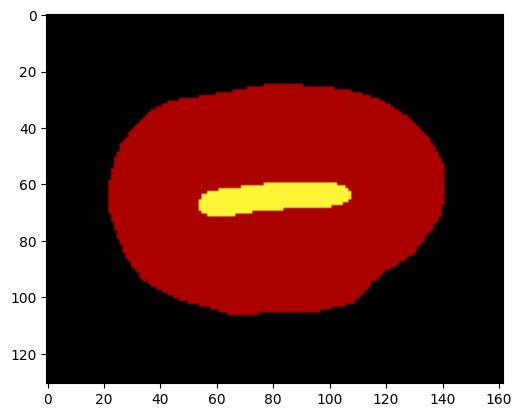

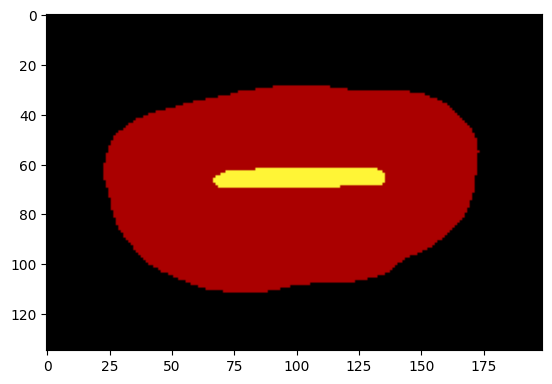

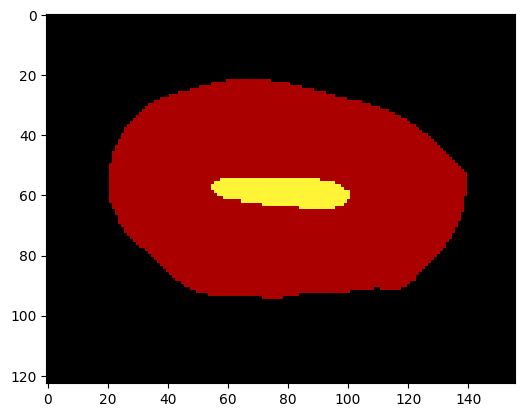

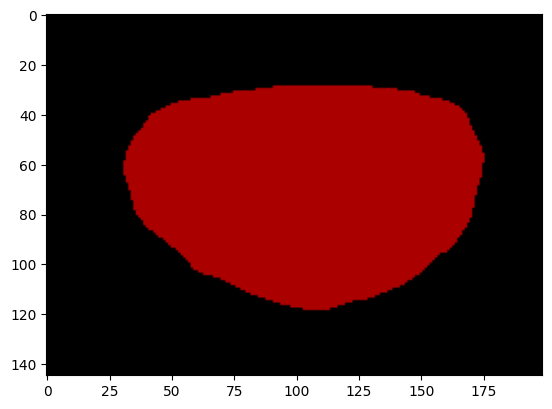

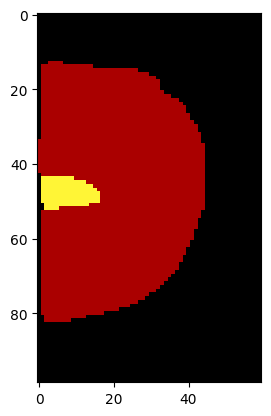

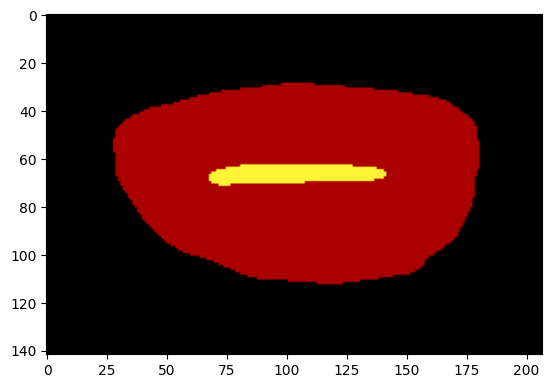

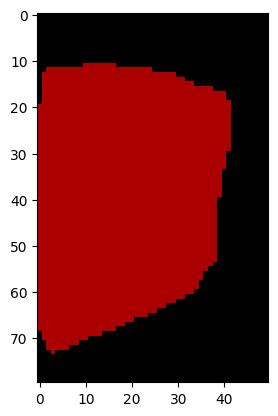

 11%|█         | 1/9 [00:09<01:17,  9.72s/it]

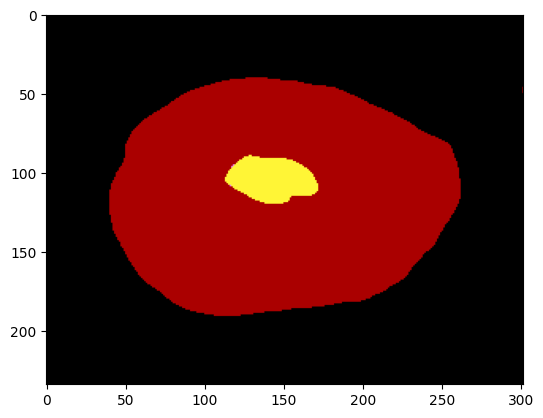

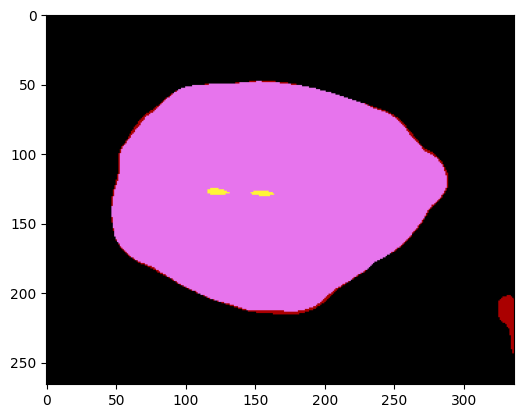

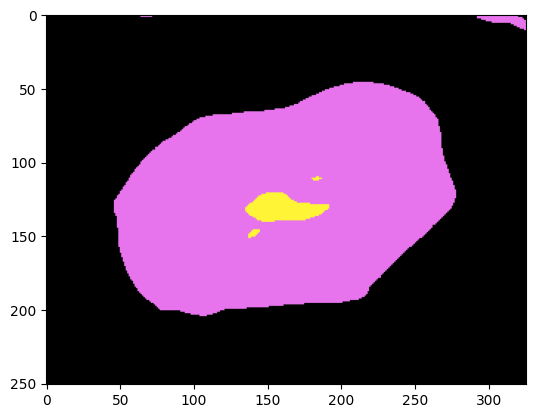

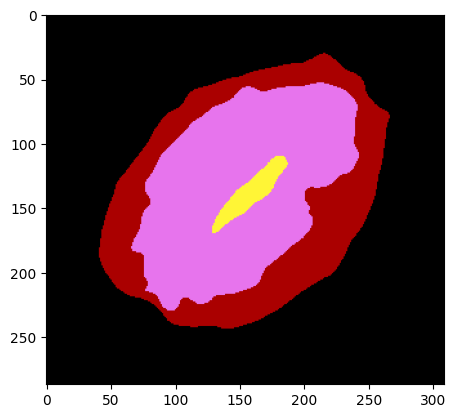

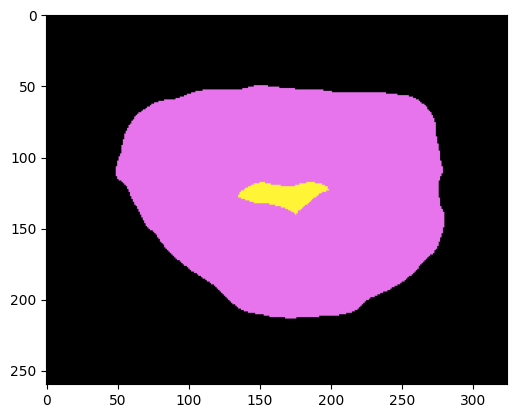

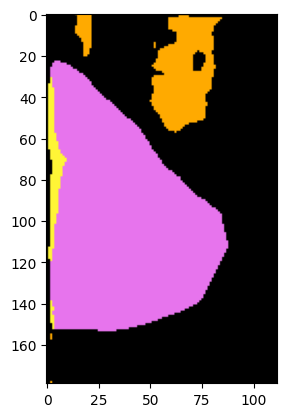

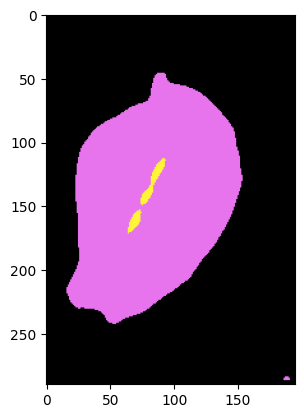

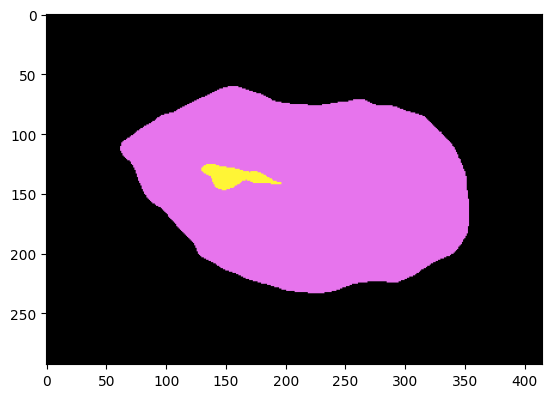

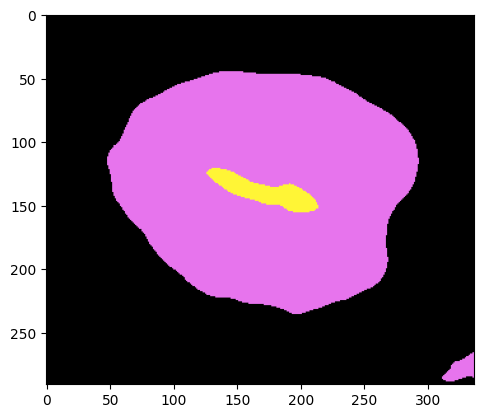

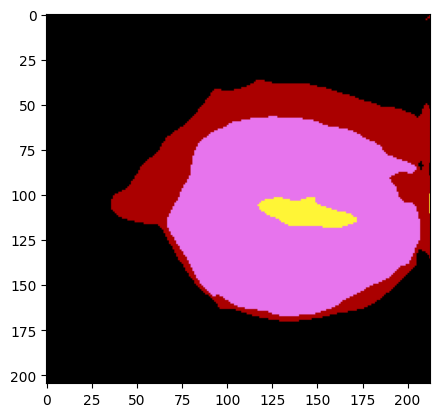

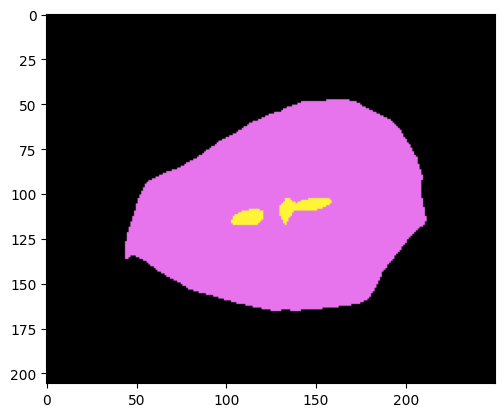

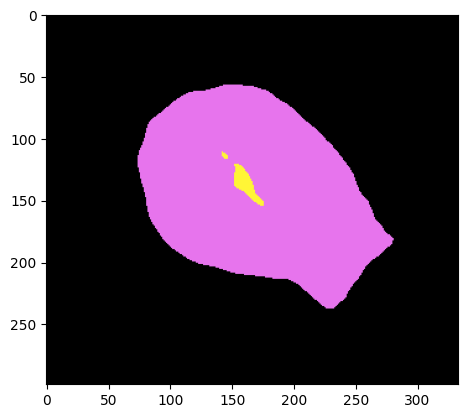

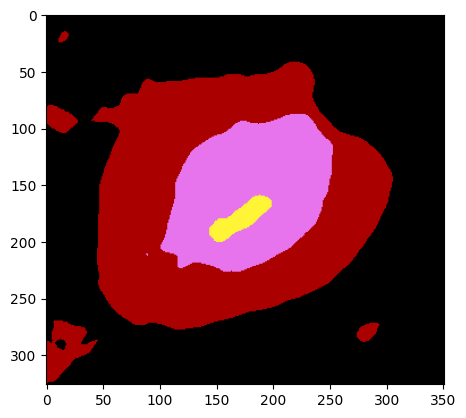

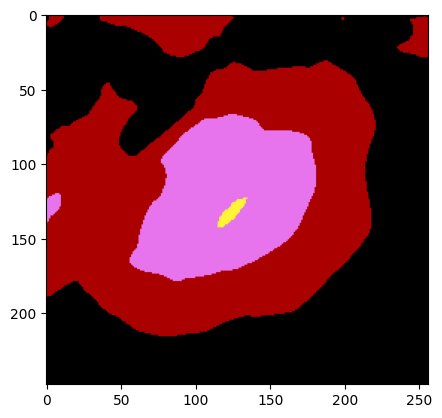

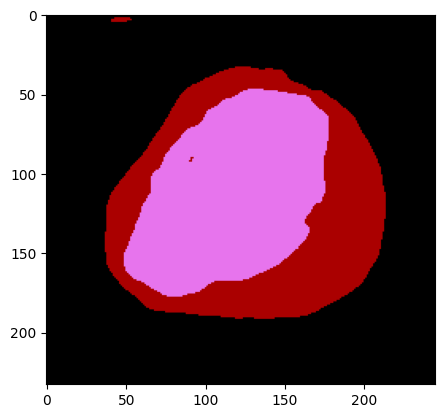

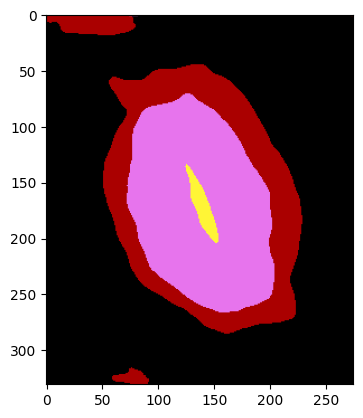

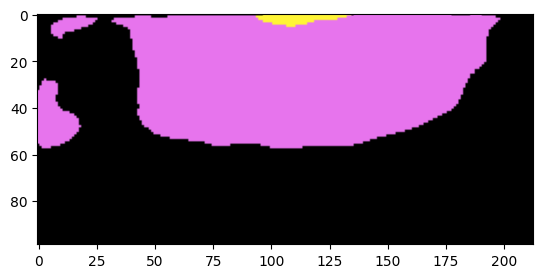

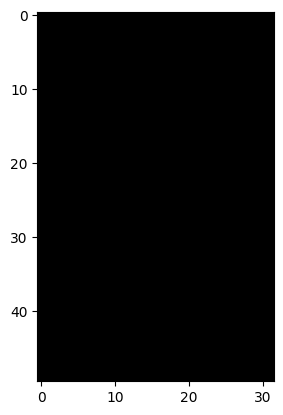

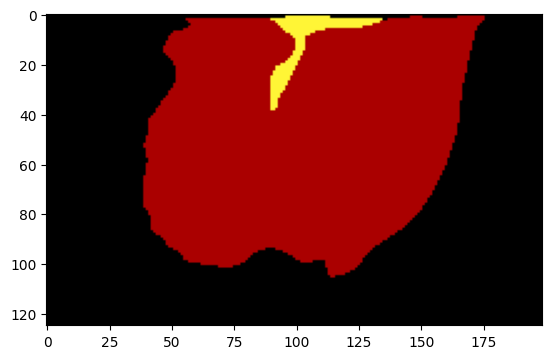

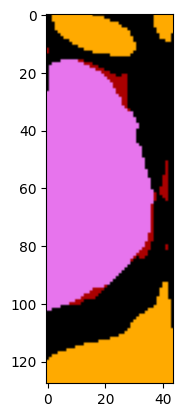

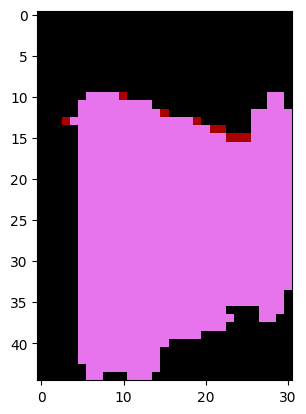

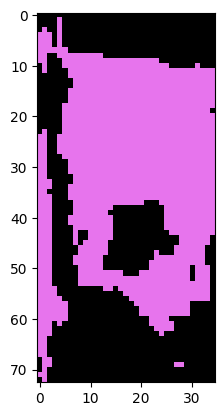

 22%|██▏       | 2/9 [00:22<01:20, 11.53s/it]

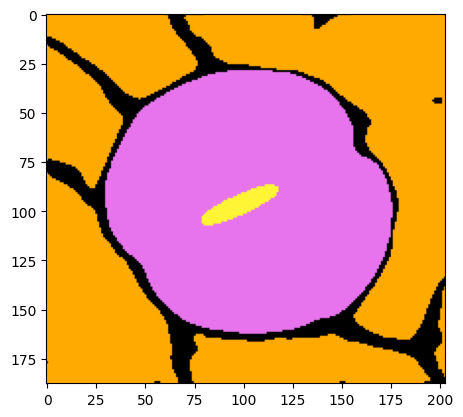

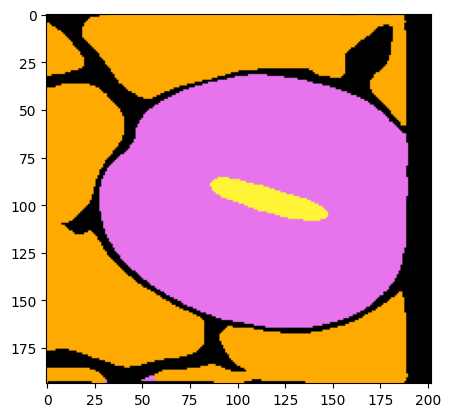

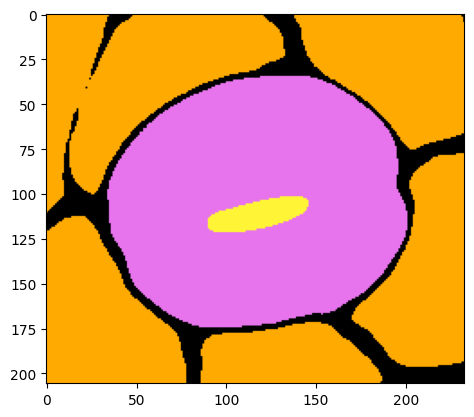

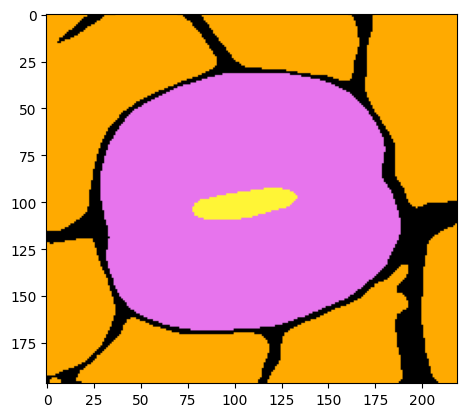

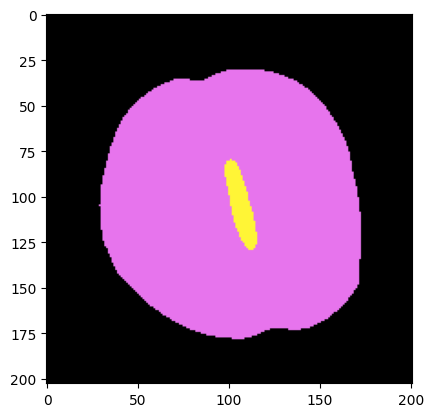

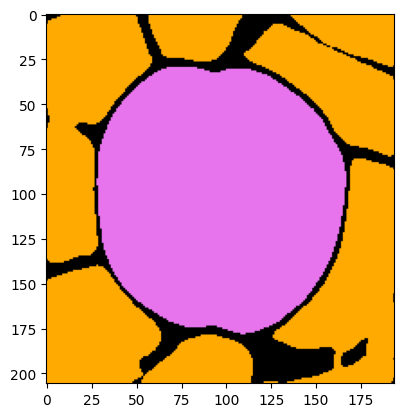

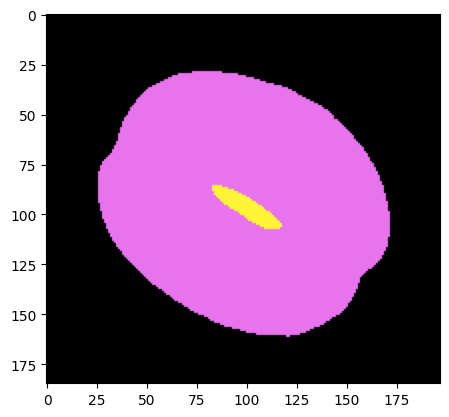

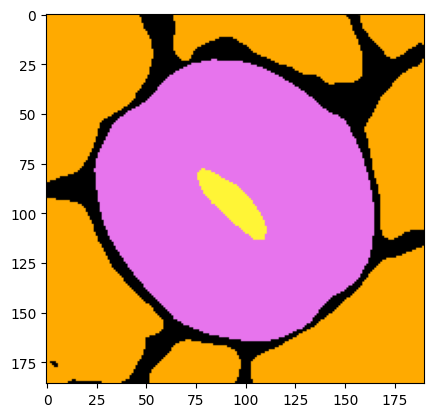

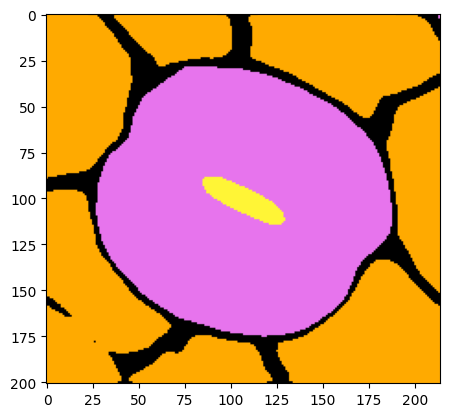

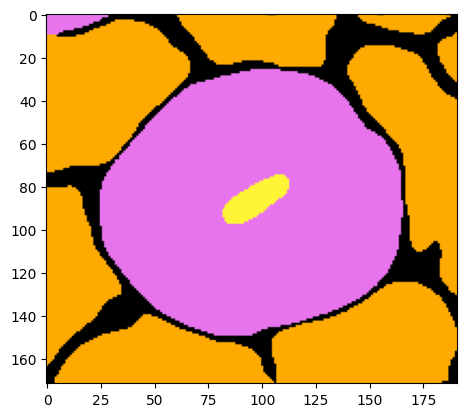

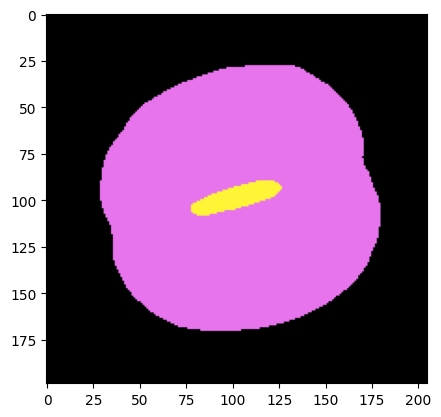

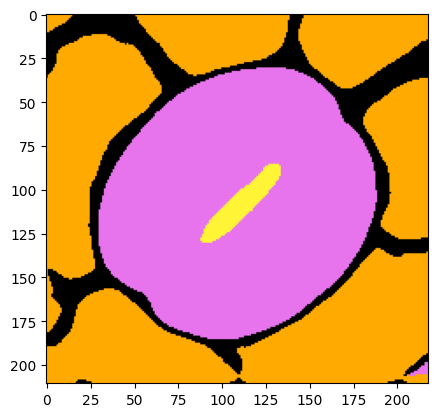

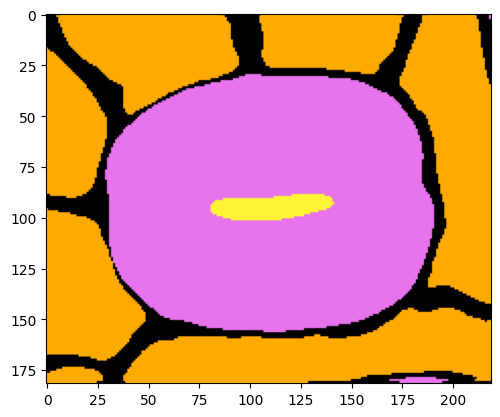

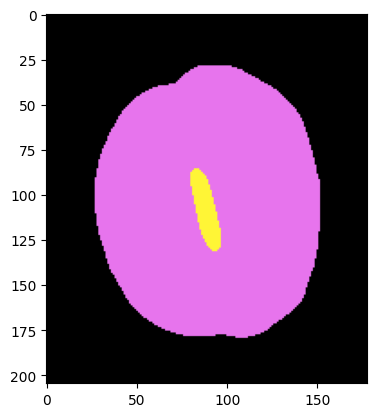

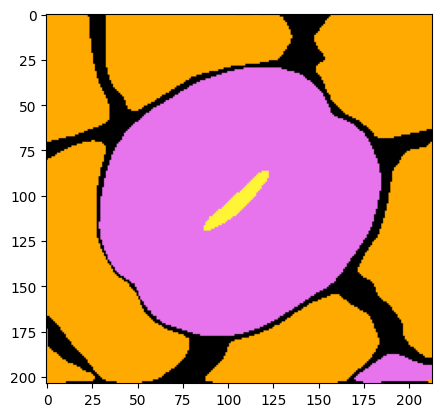

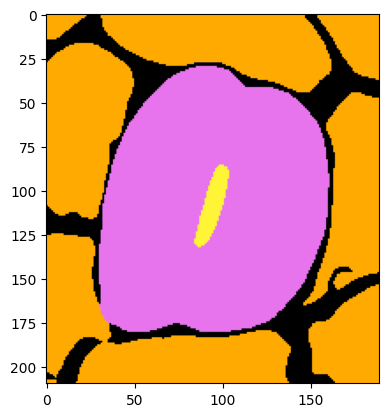

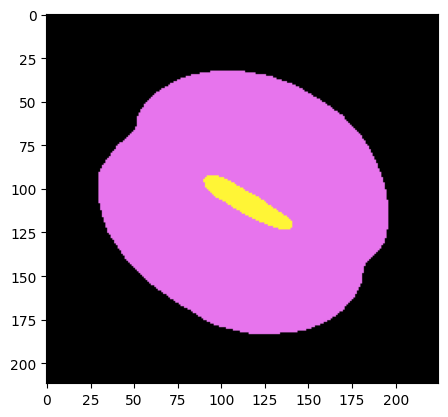

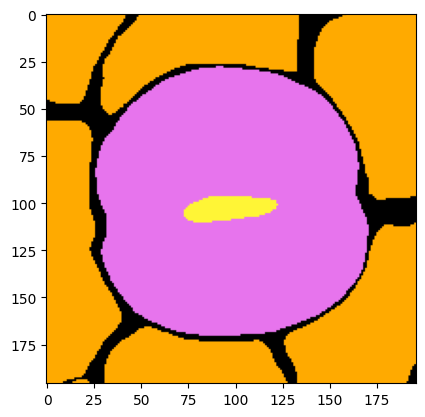

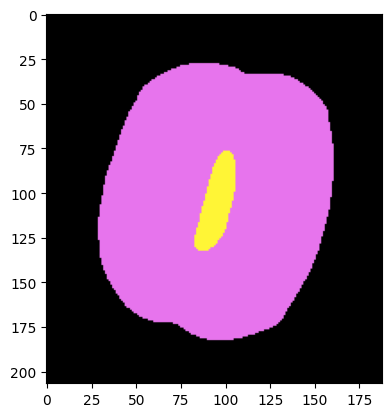

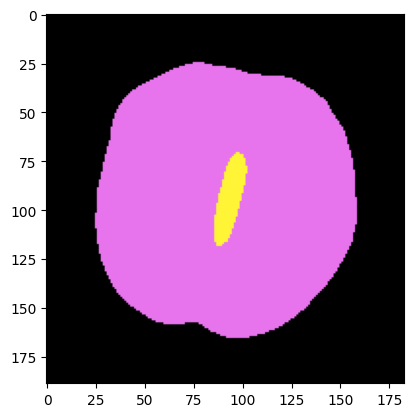

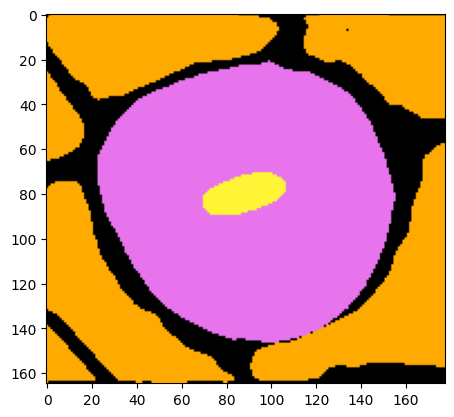

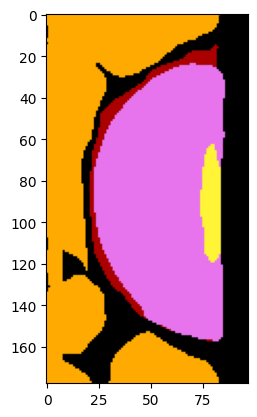

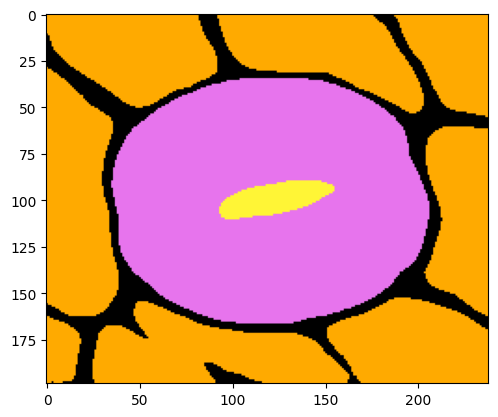

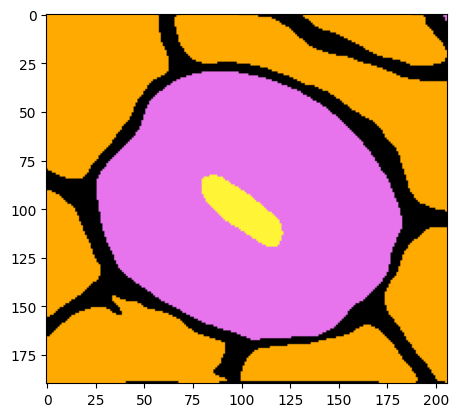

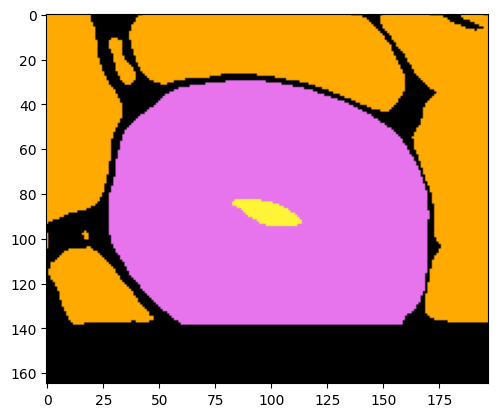

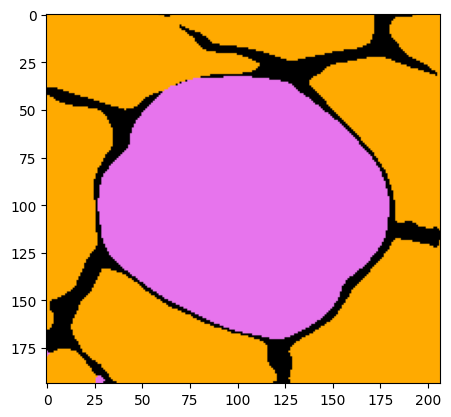

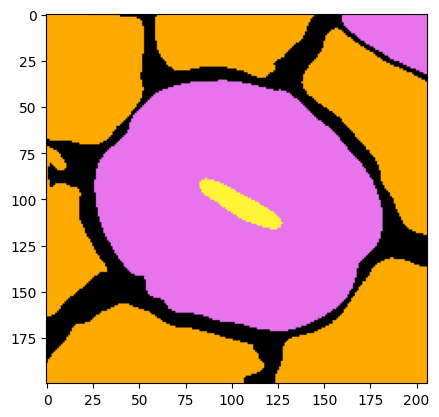

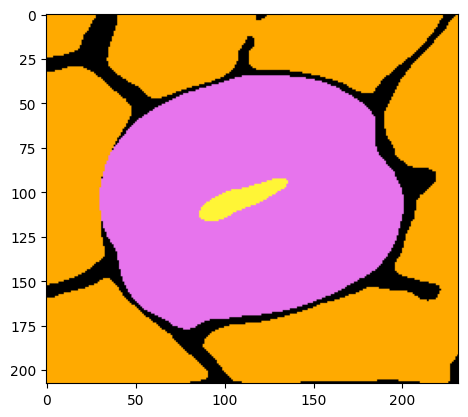

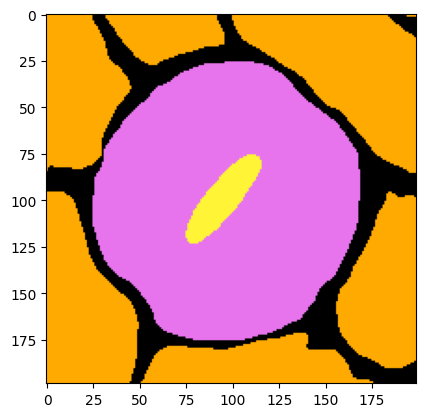

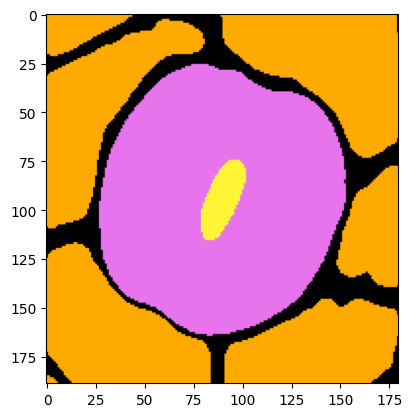

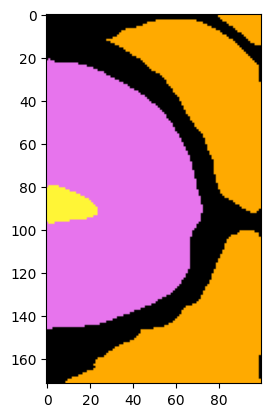

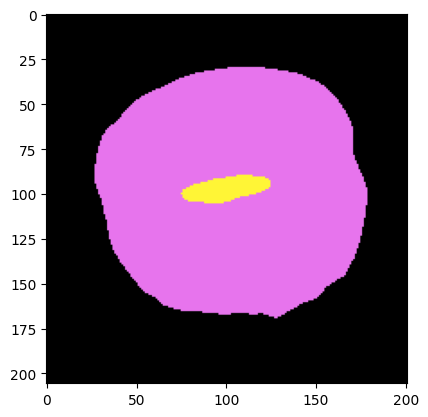

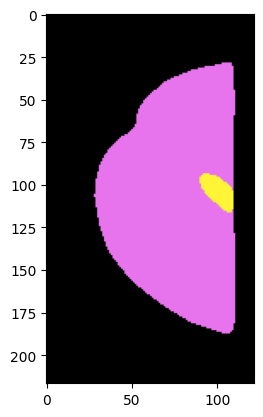

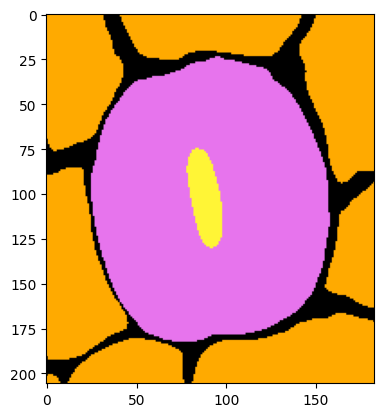

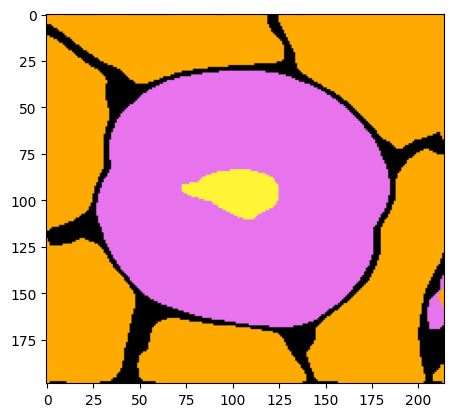

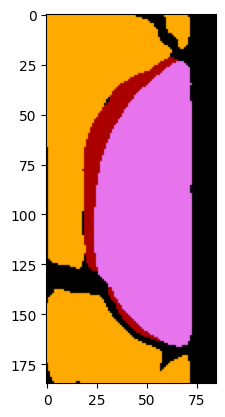

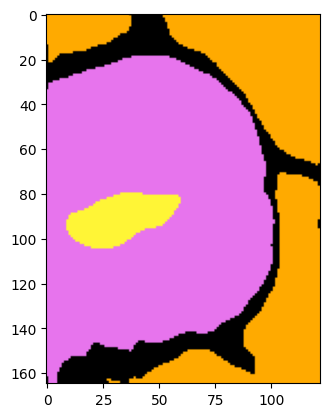

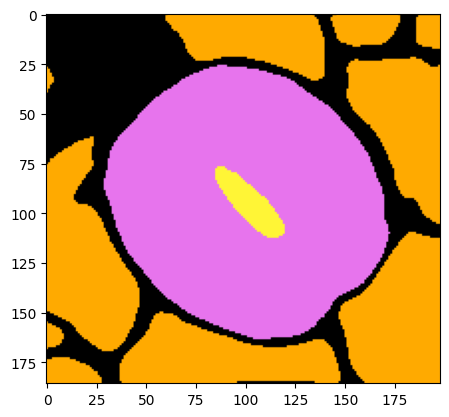

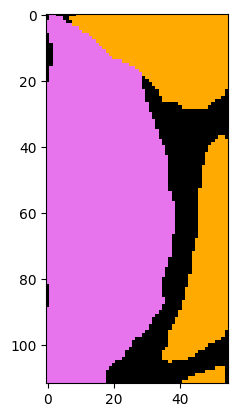

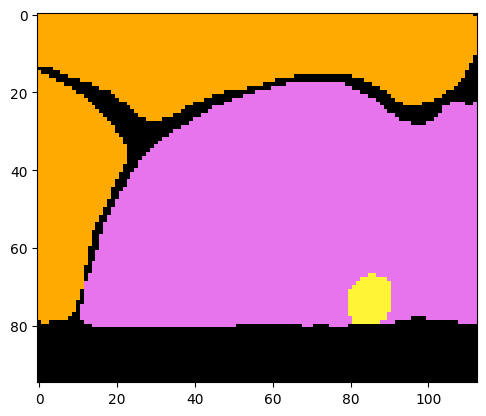

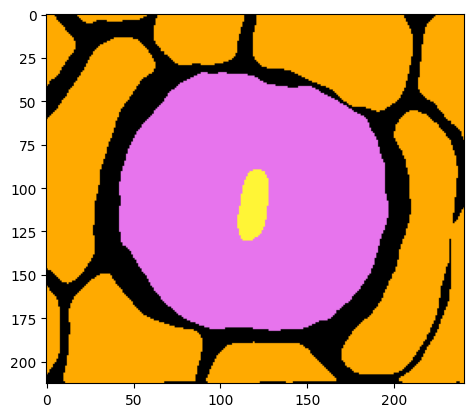

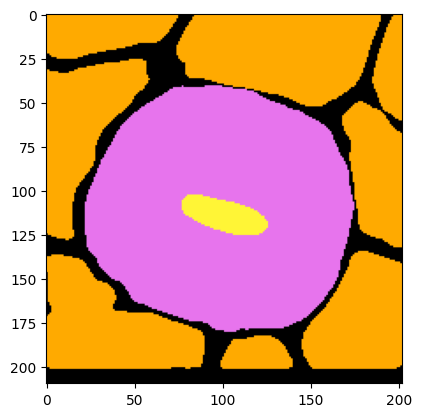

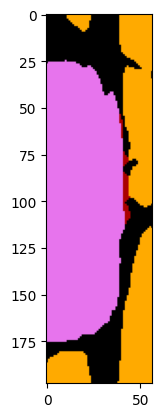

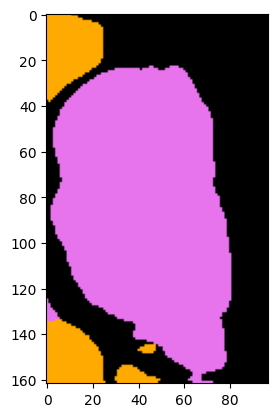

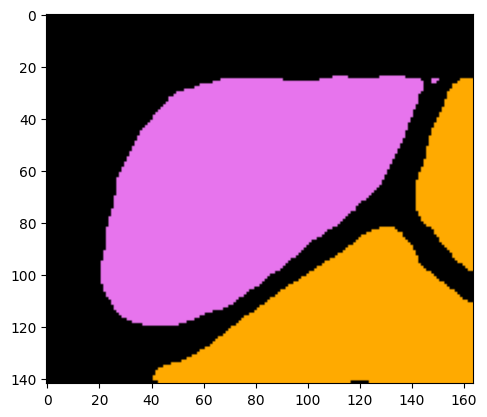

 33%|███▎      | 3/9 [00:44<01:37, 16.26s/it]

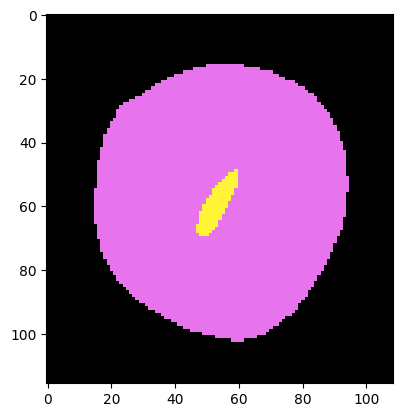

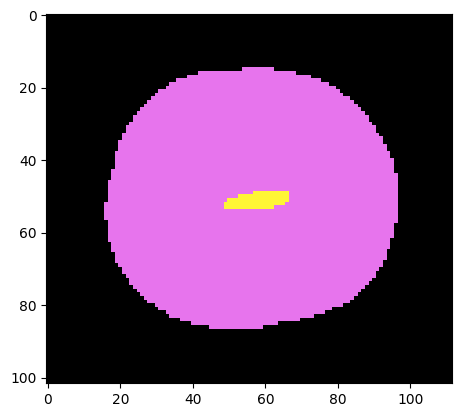

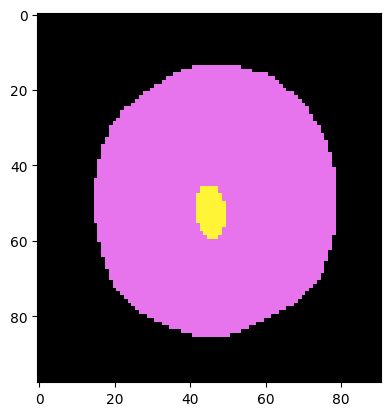

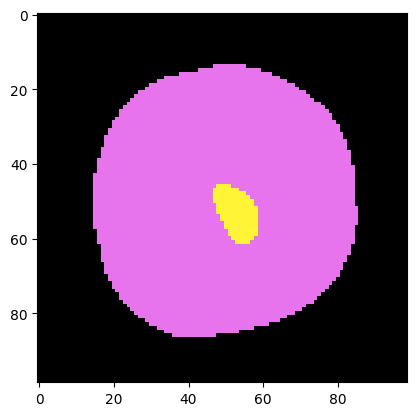

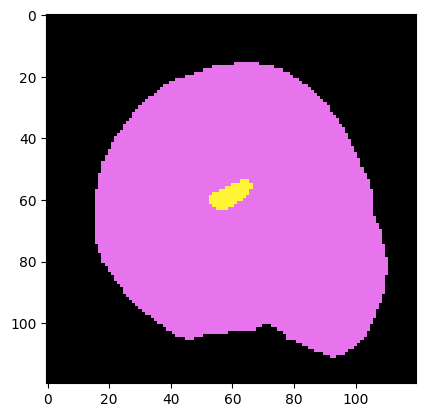

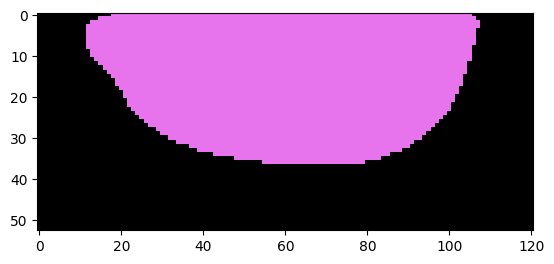

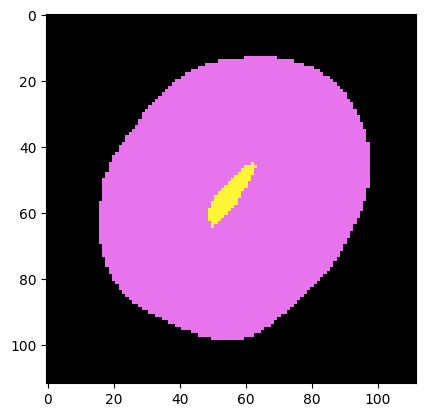

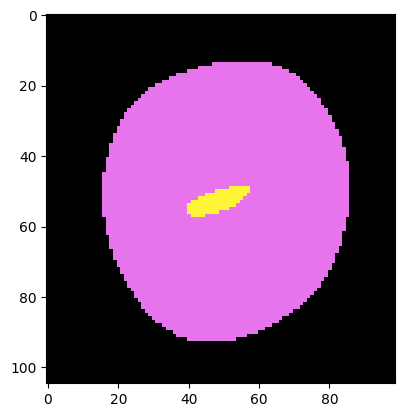

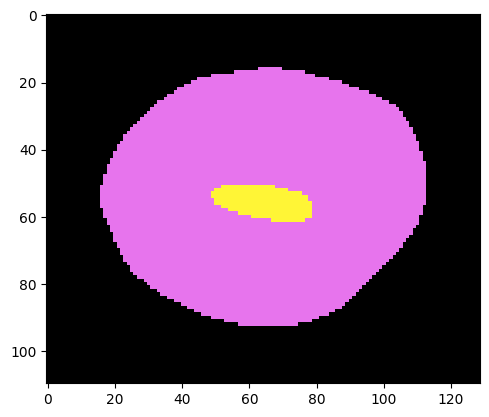

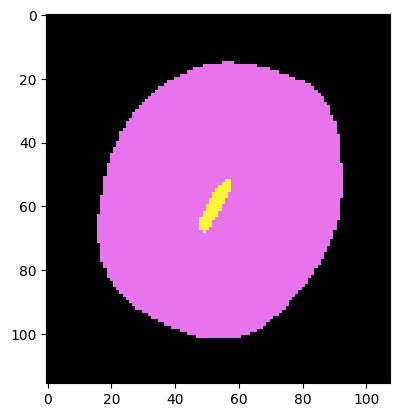

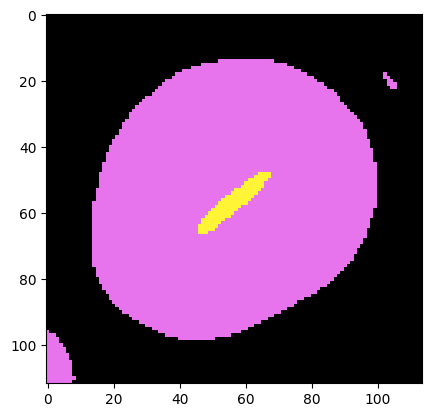

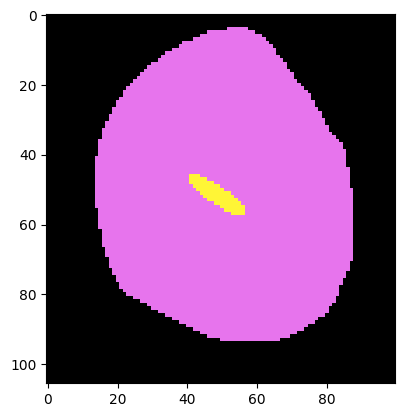

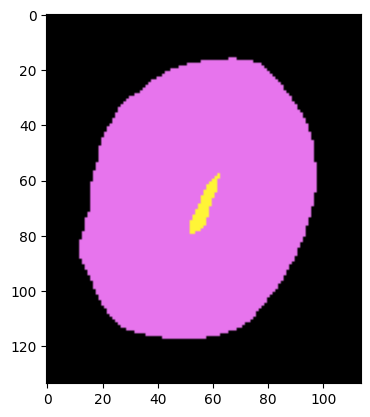

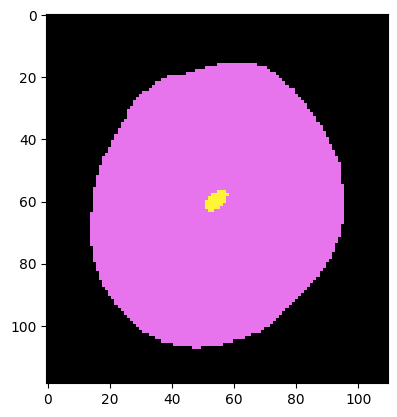

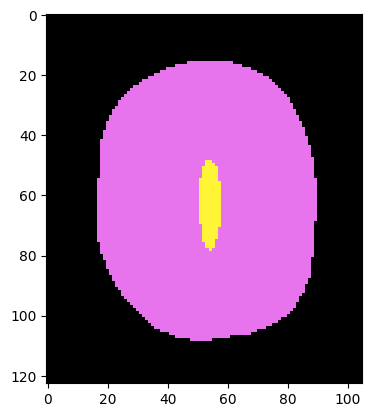

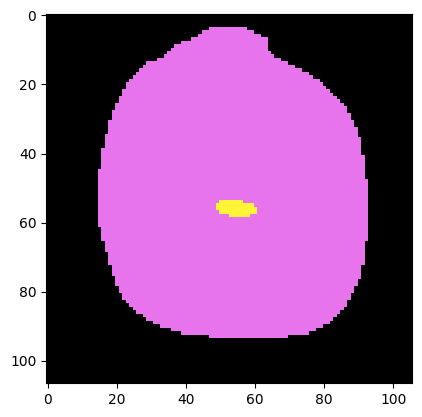

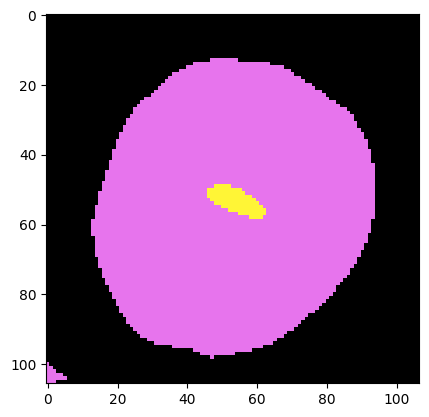

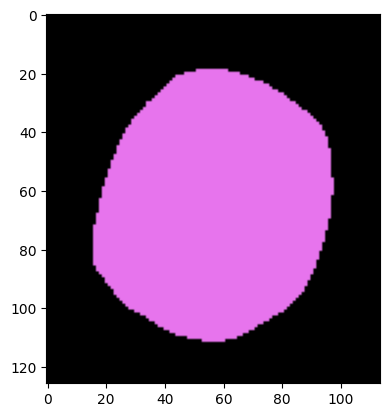

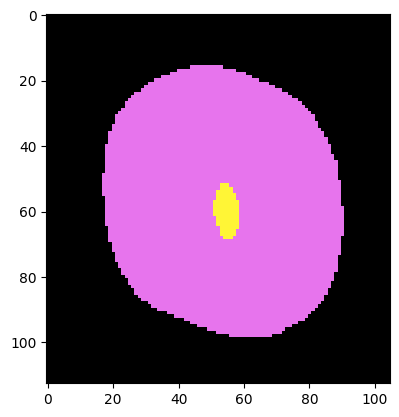

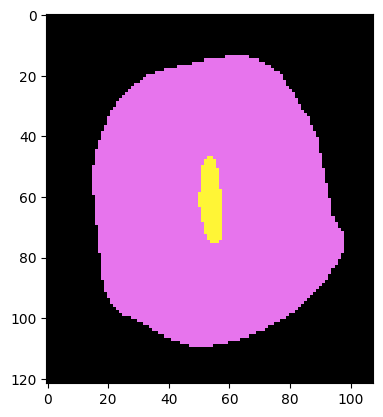

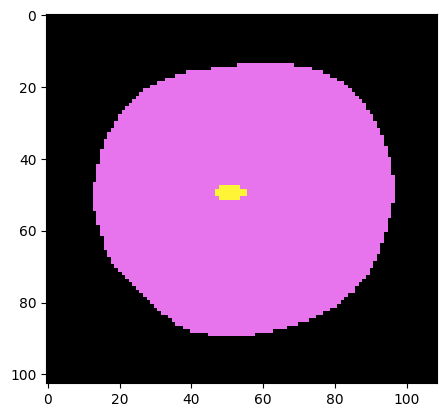

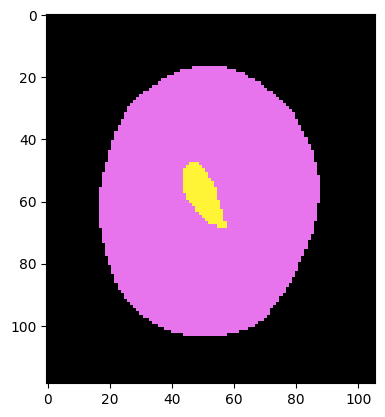

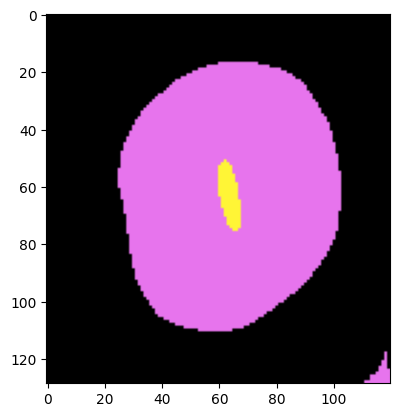

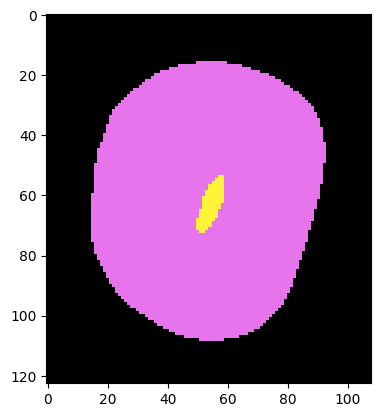

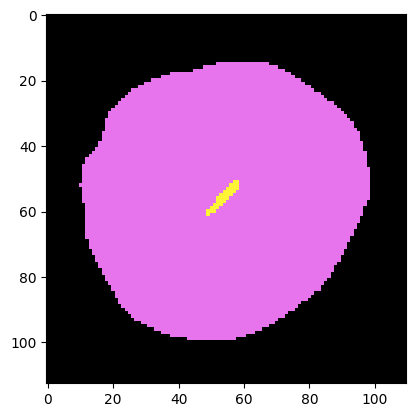

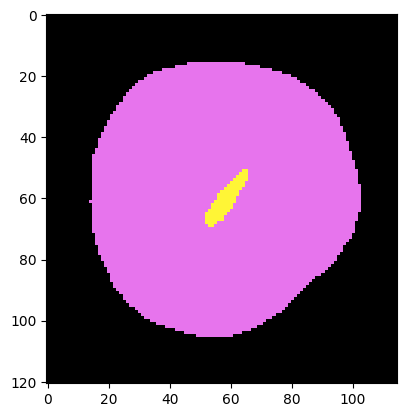

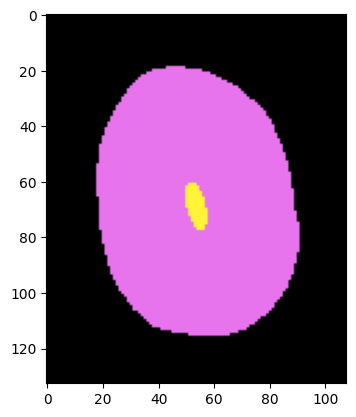

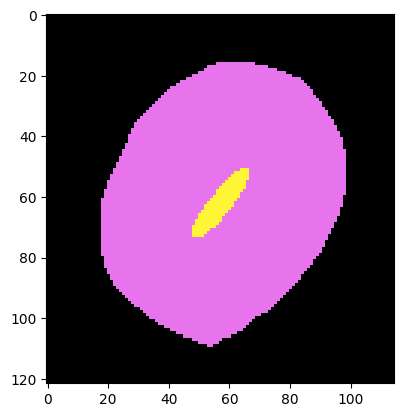

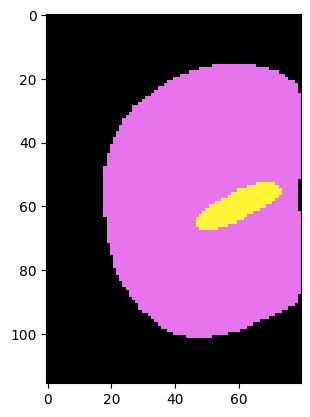

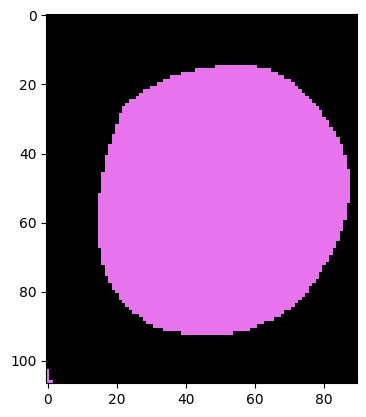

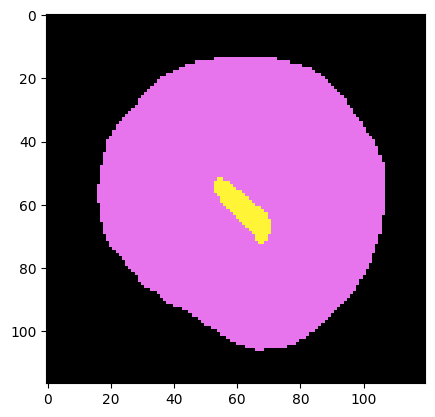

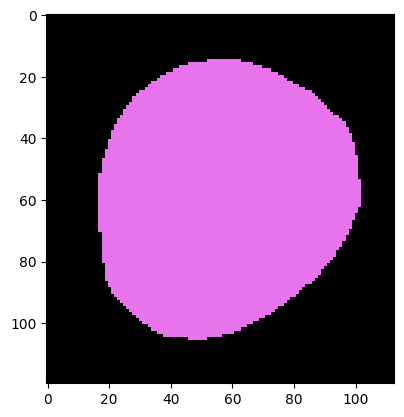

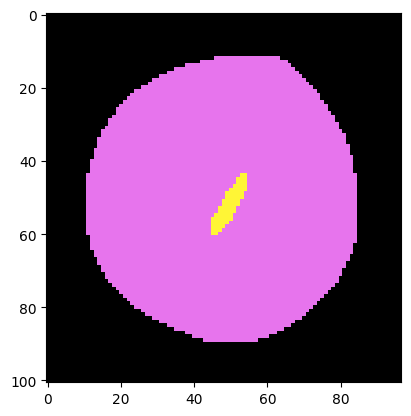

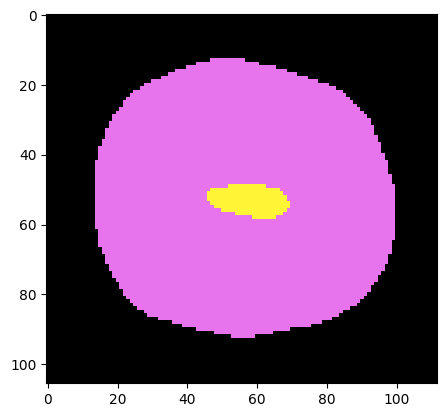

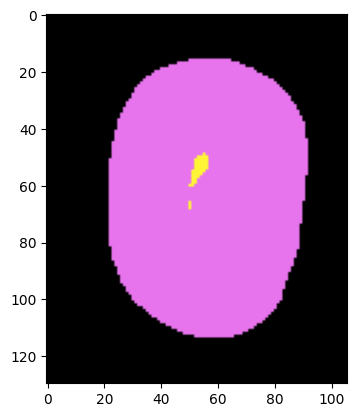

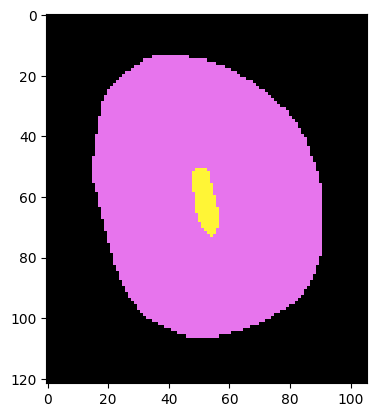

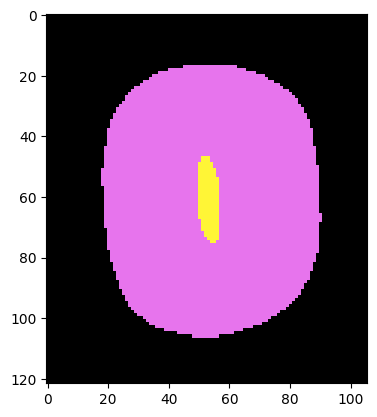

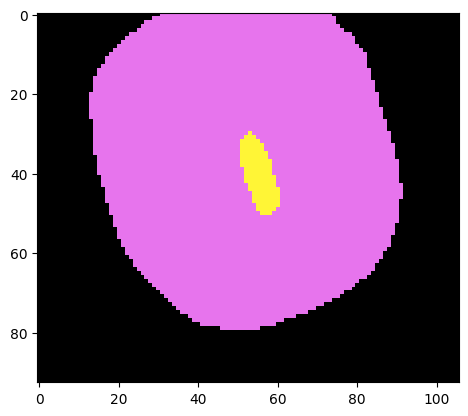

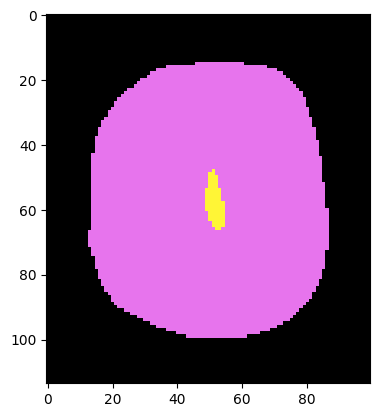

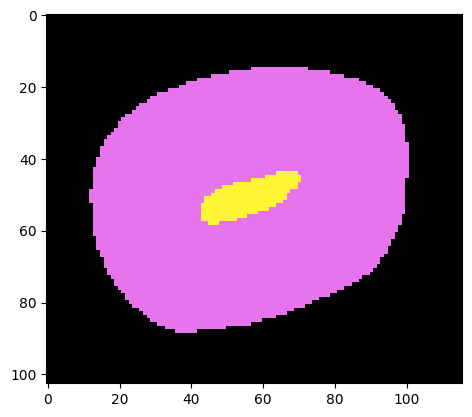

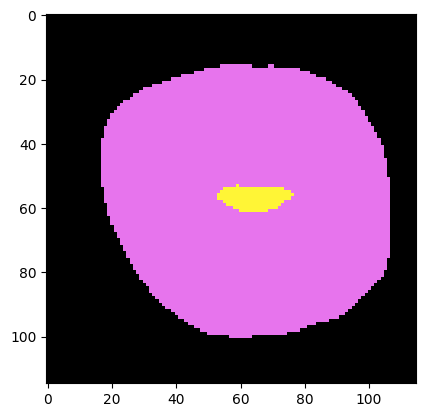

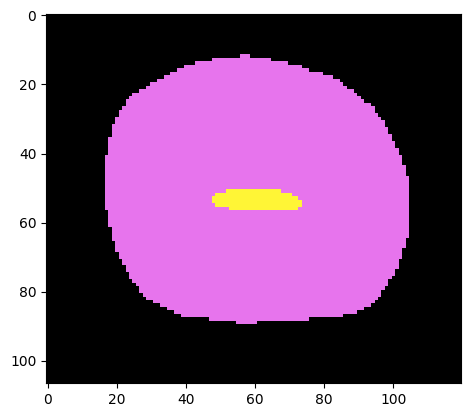

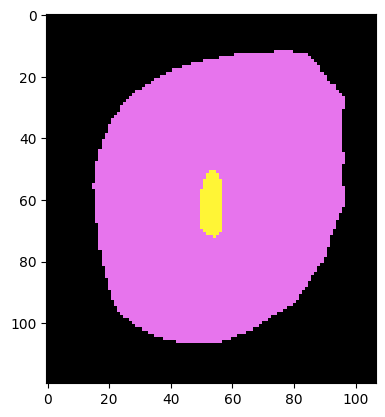

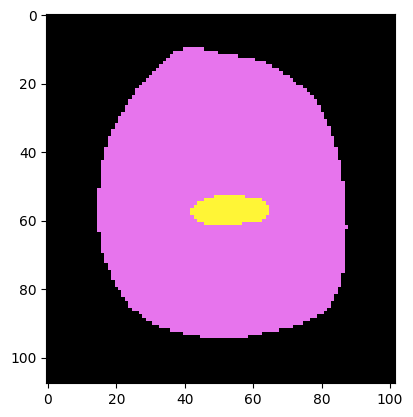

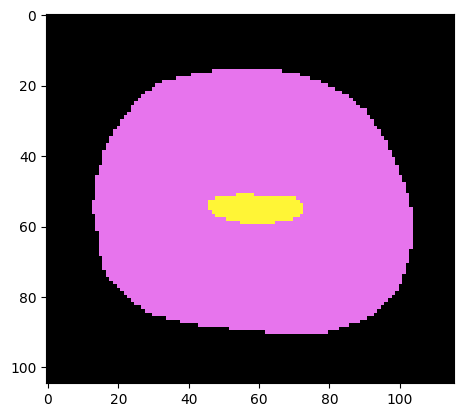

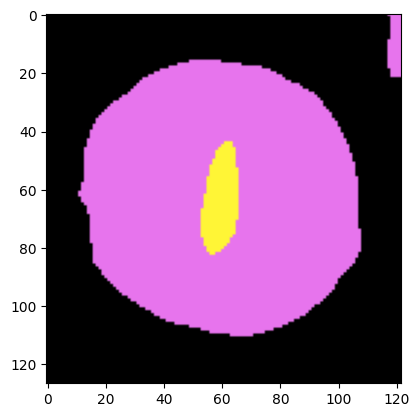

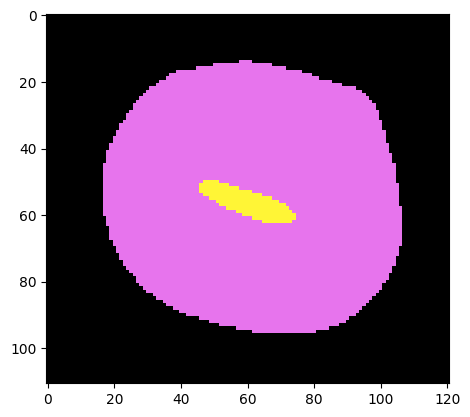

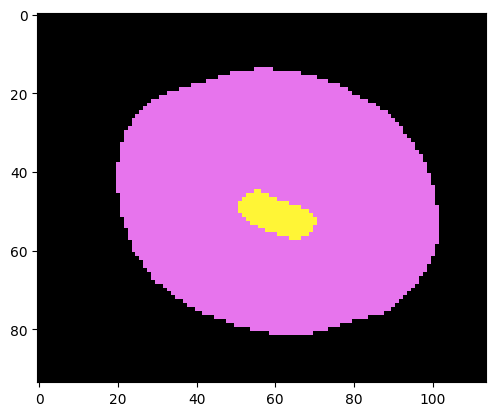

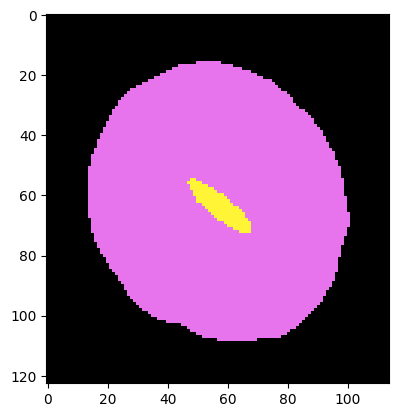

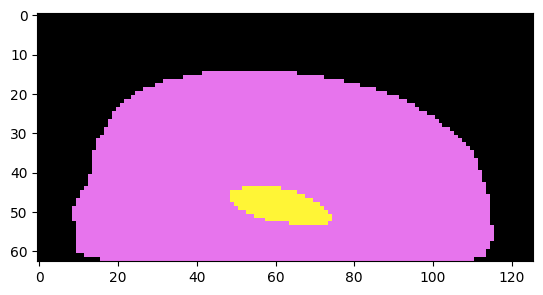

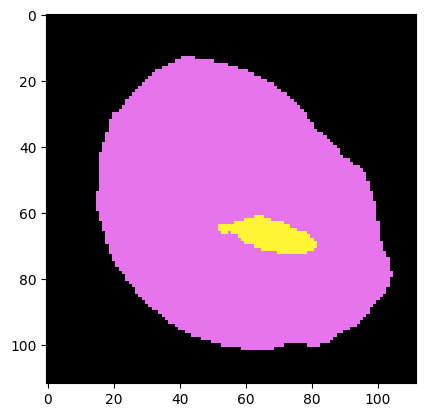

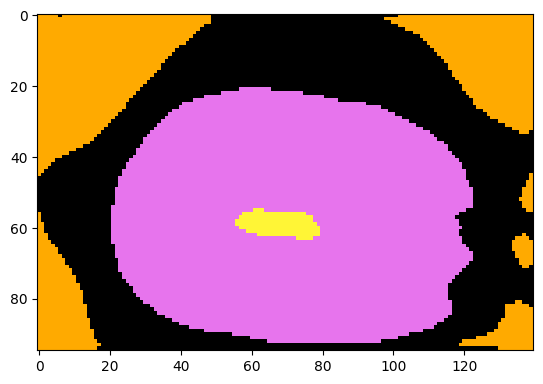

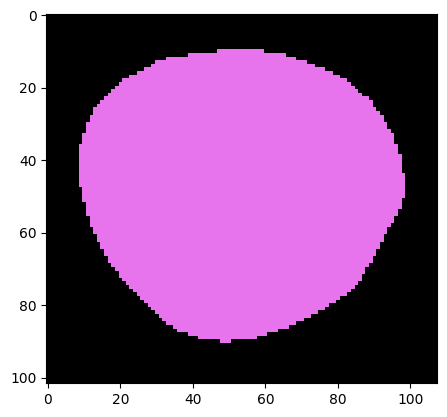

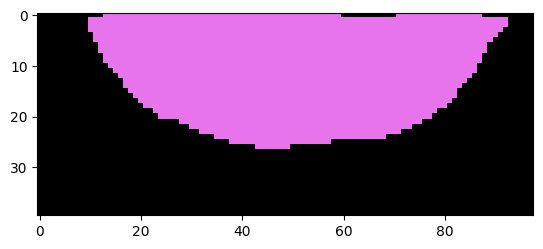

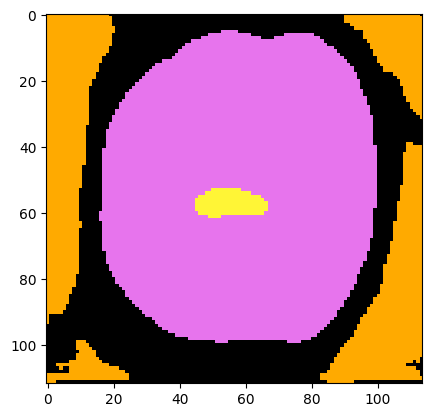

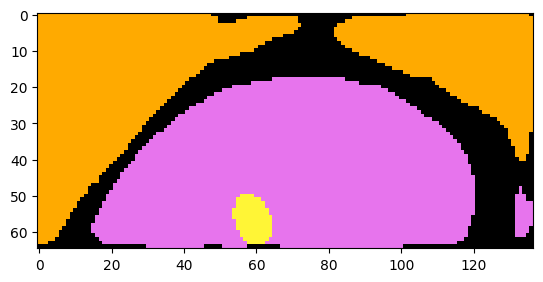

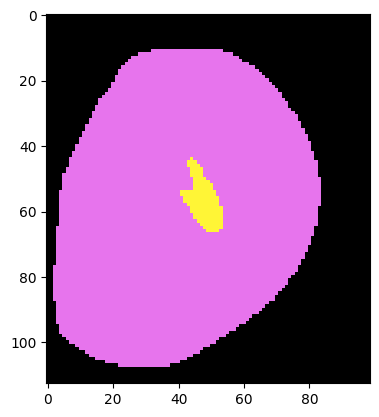

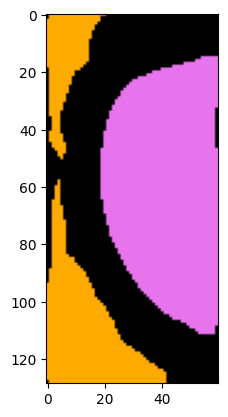

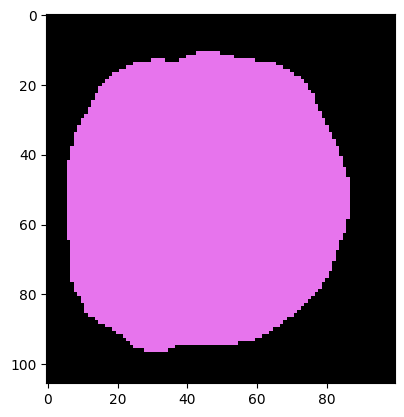

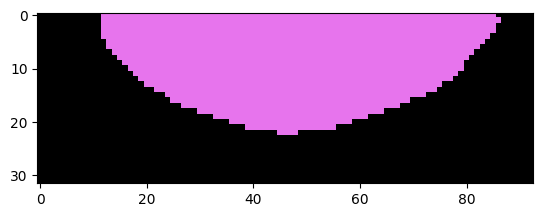

 44%|████▍     | 4/9 [01:15<01:49, 21.94s/it]

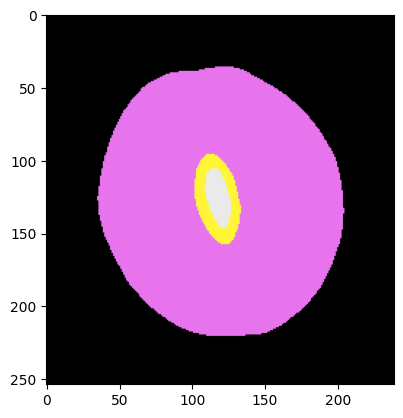

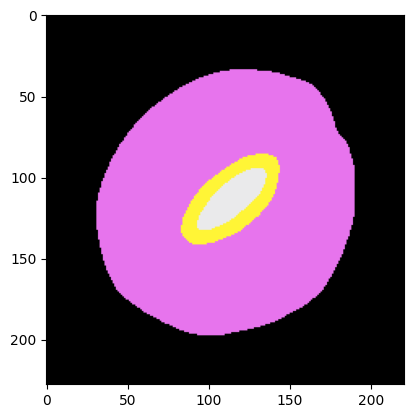

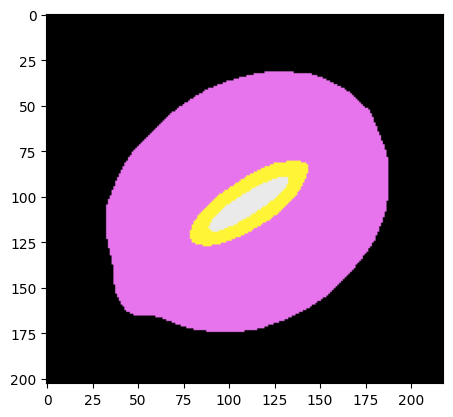

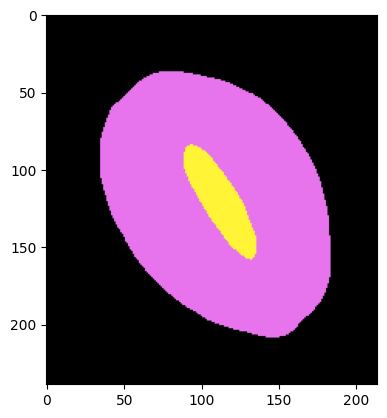

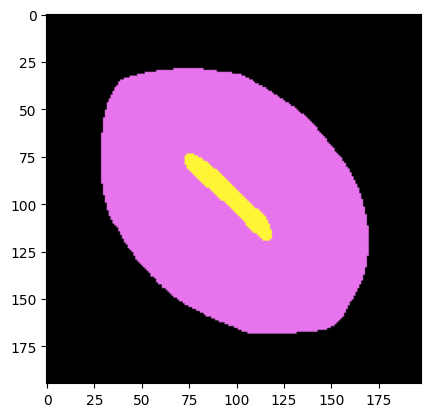

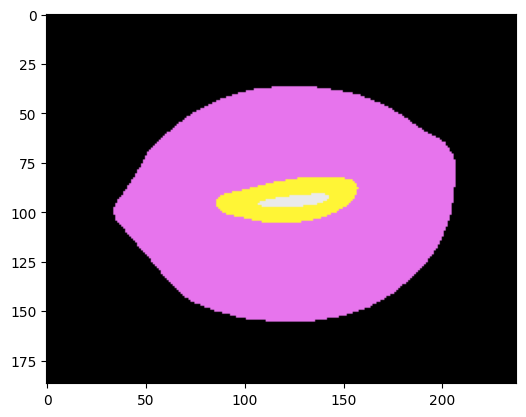

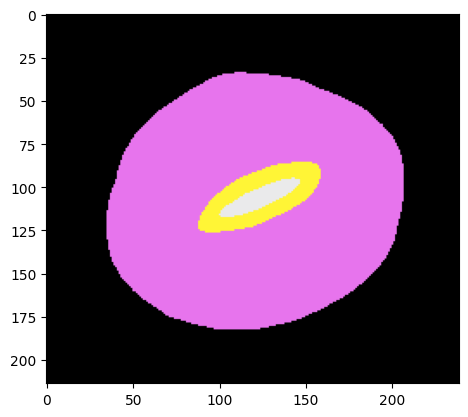

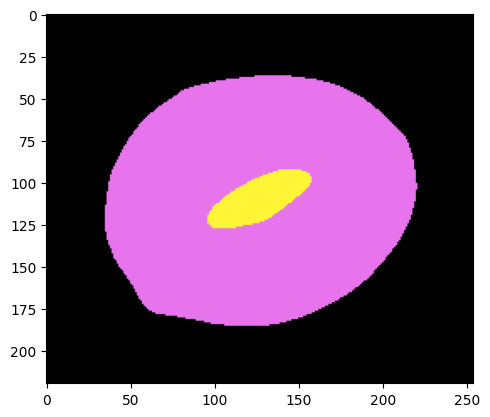

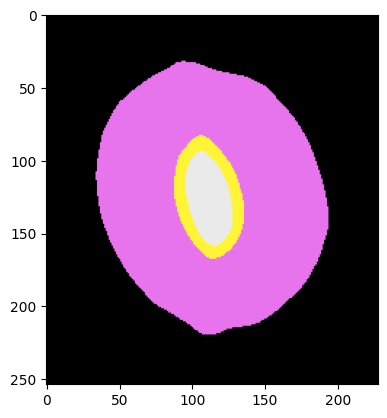

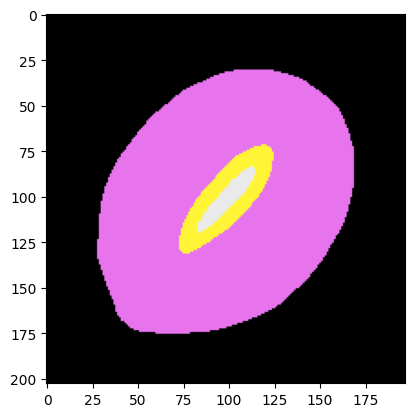

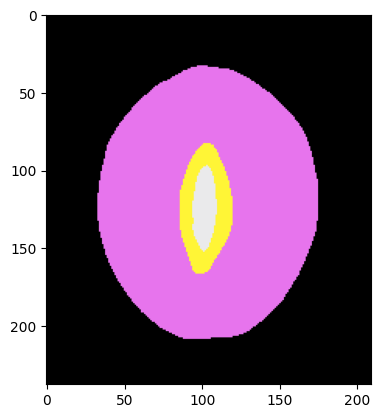

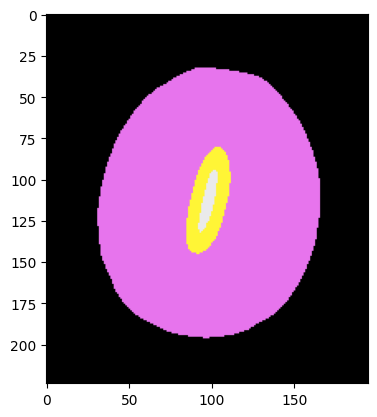

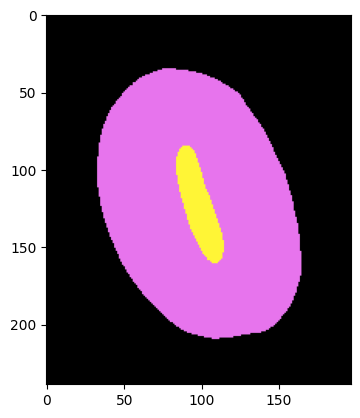

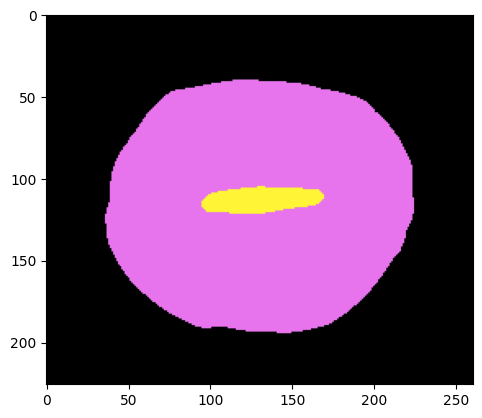

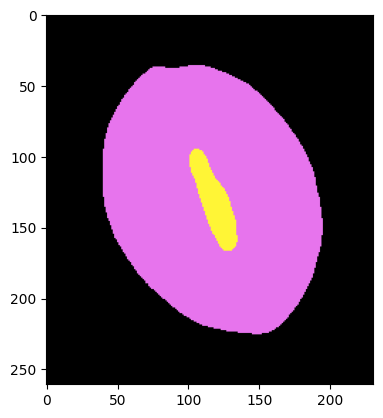

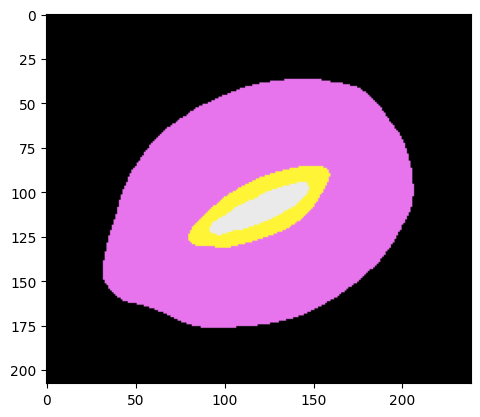

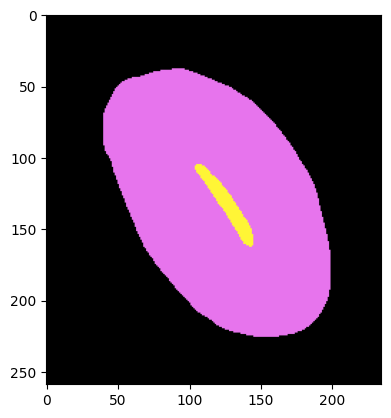

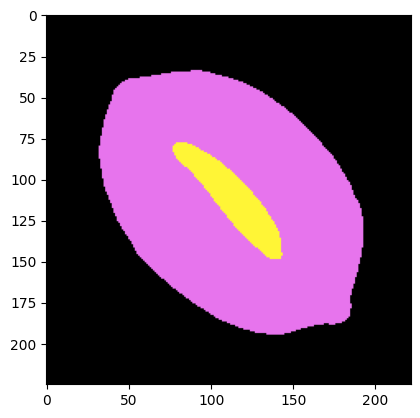

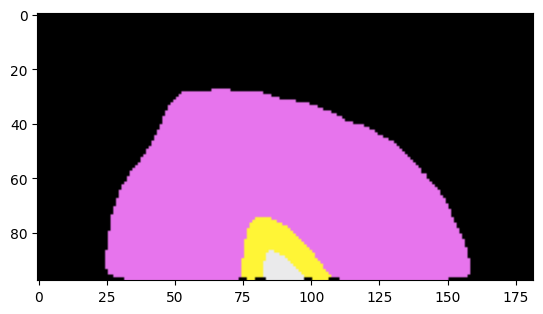

 56%|█████▌    | 5/9 [01:26<01:12, 18.13s/it]

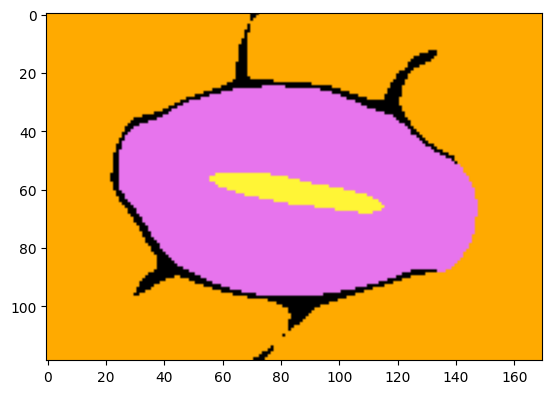

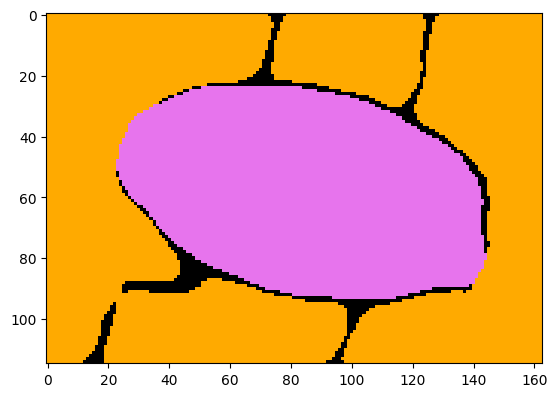

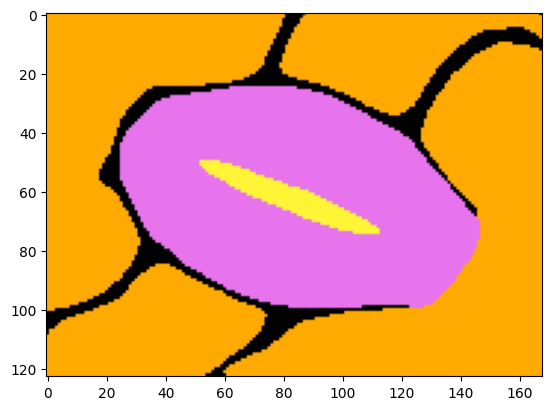

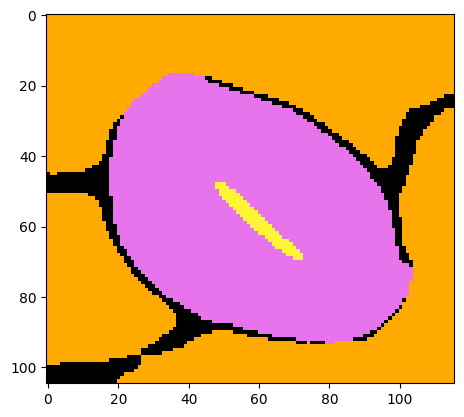

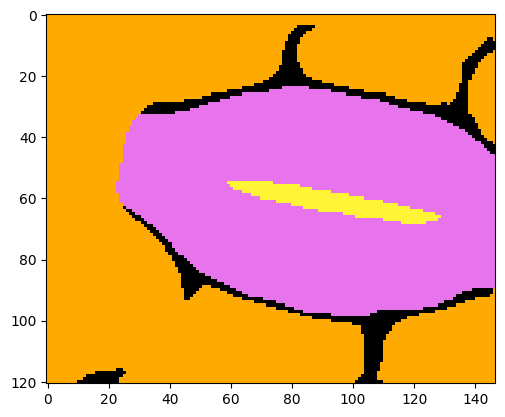

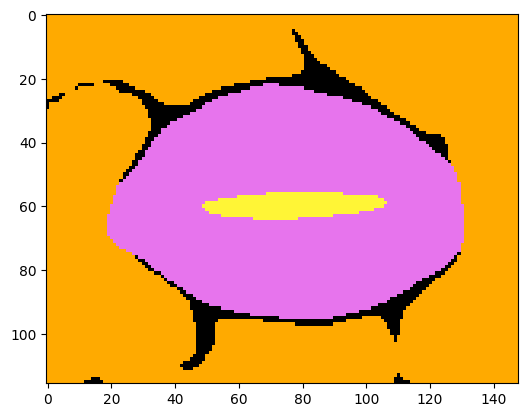

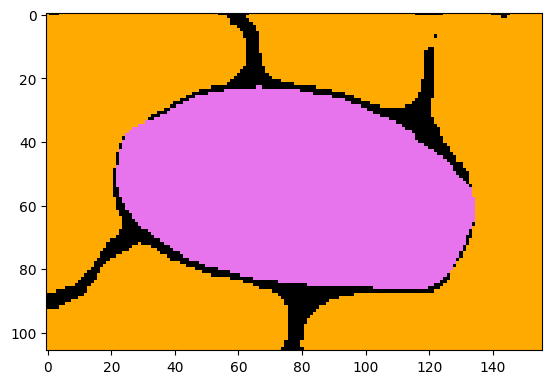

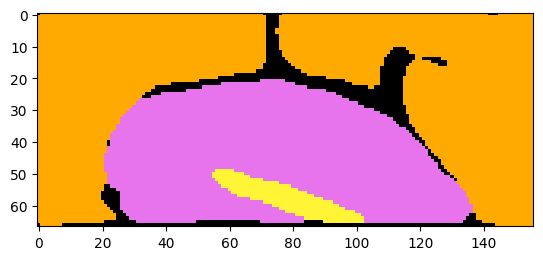

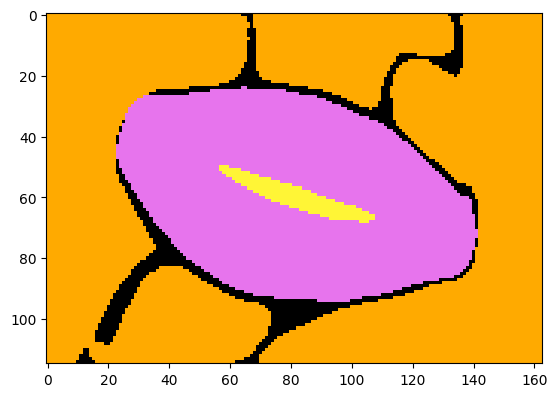

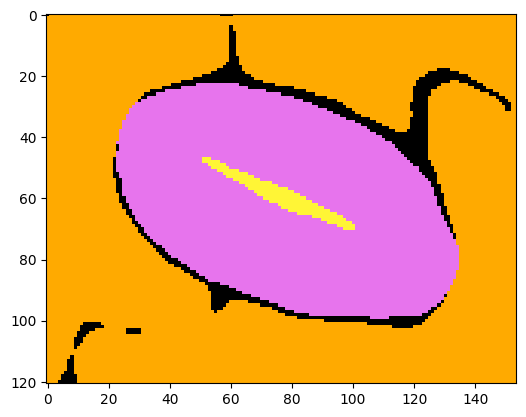

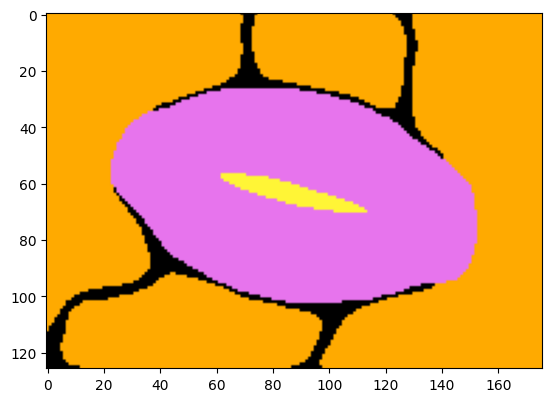

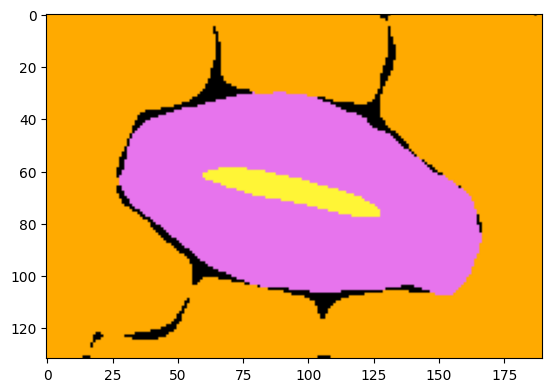

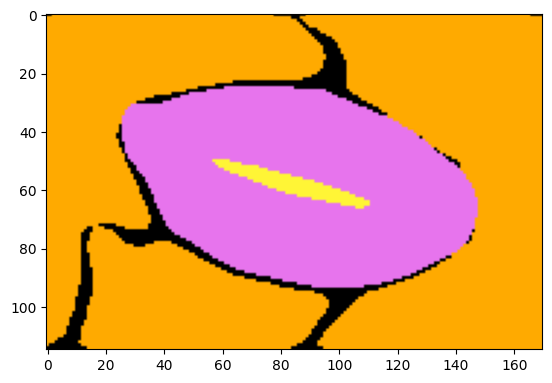

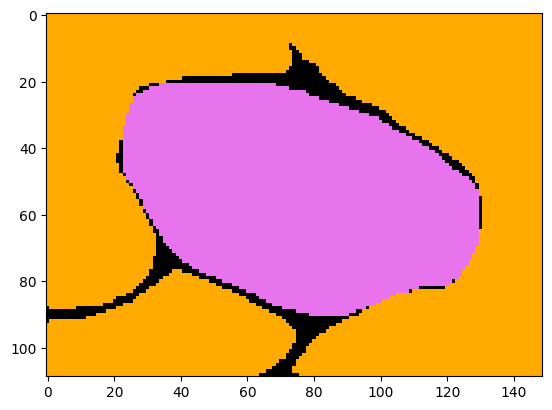

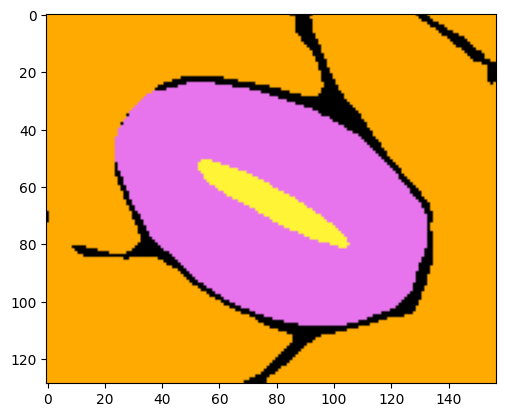

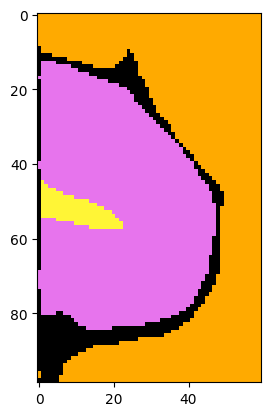

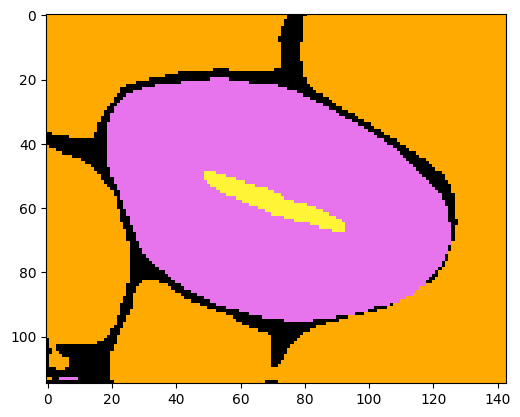

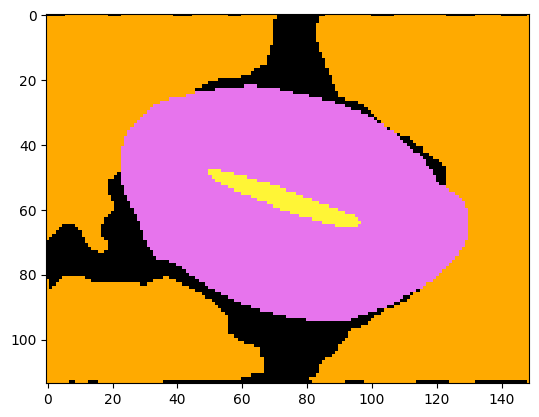

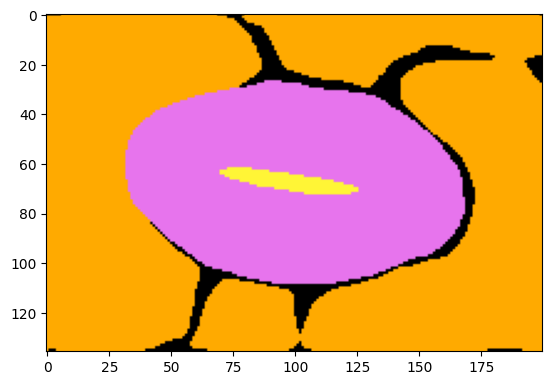

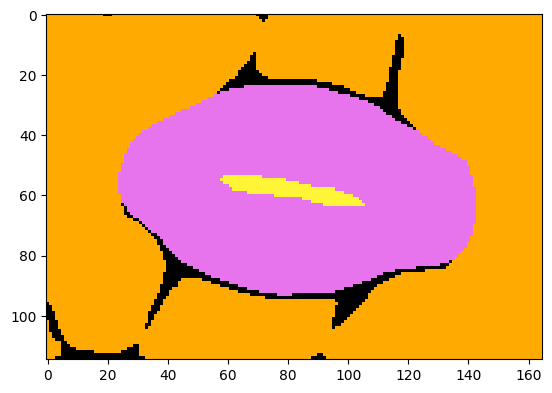

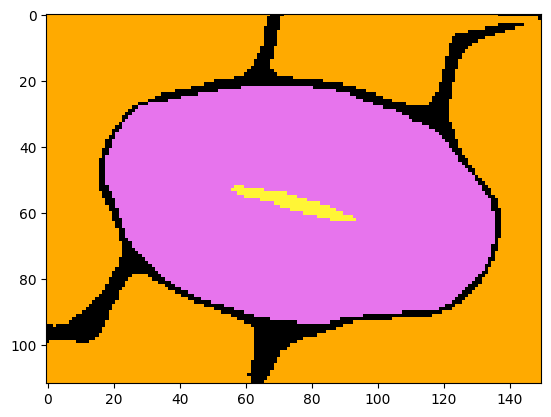

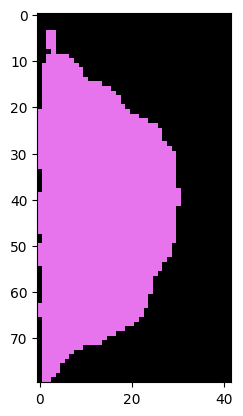

 67%|██████▋   | 6/9 [01:35<00:45, 15.21s/it]

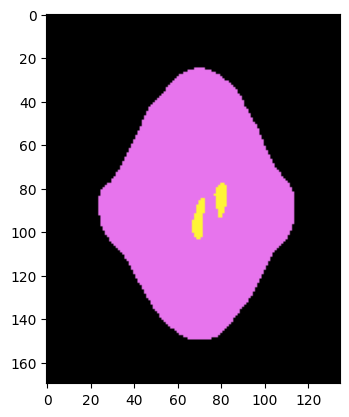

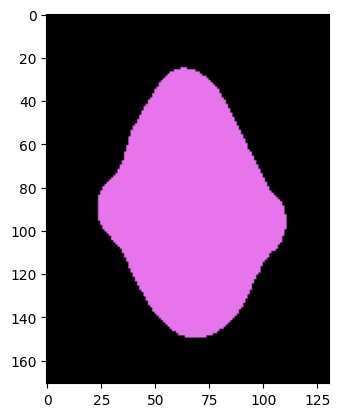

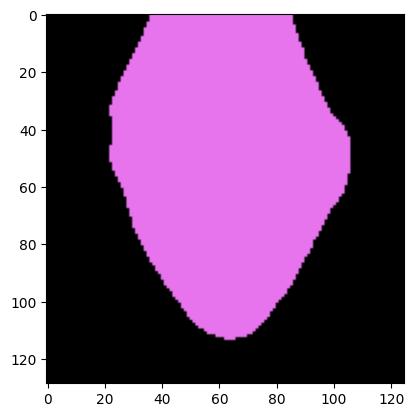

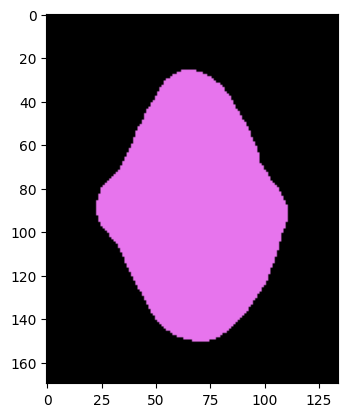

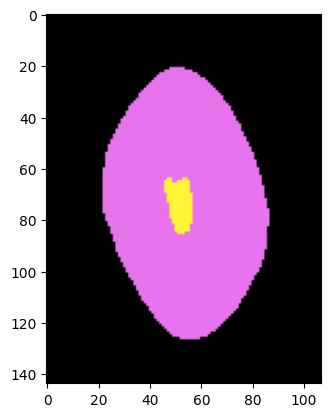

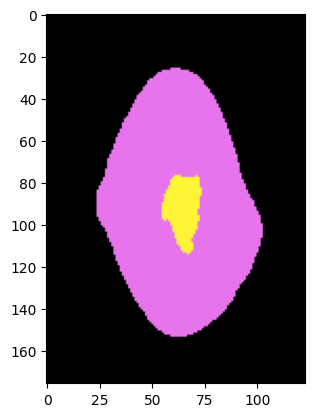

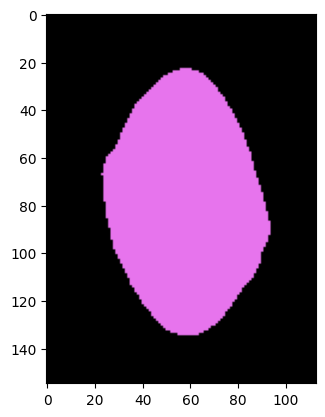

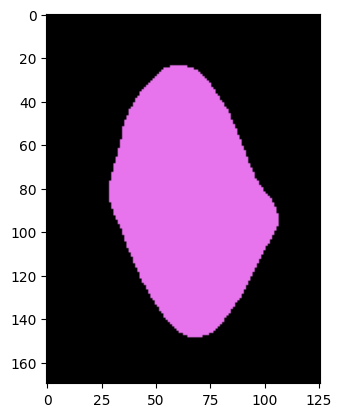

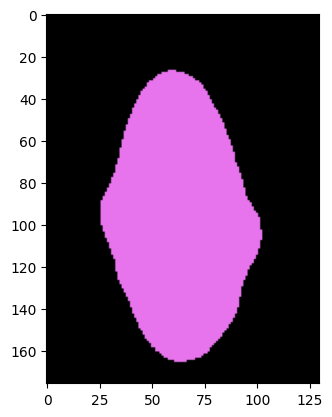

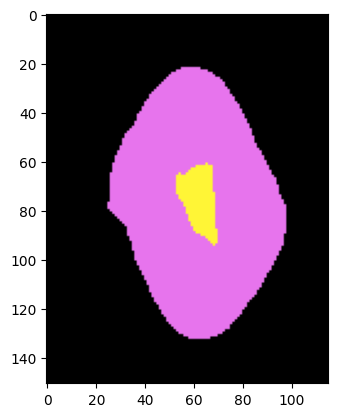

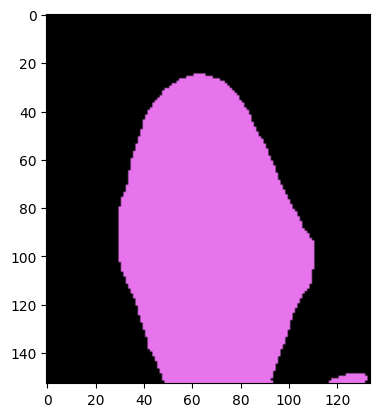

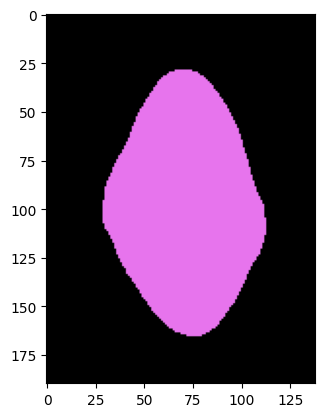

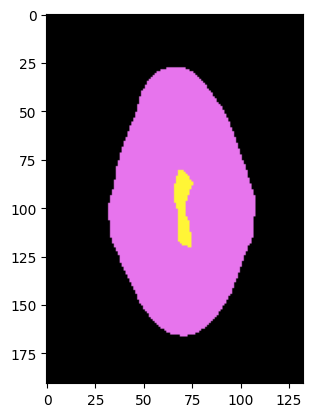

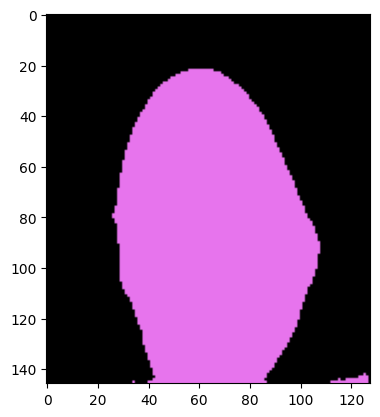

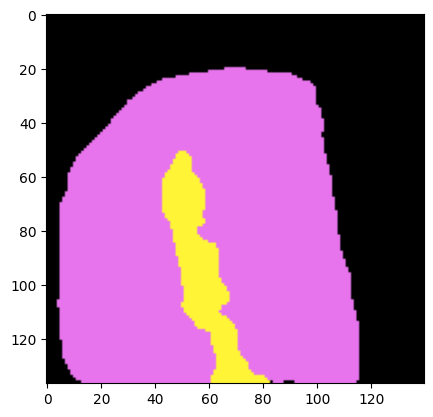

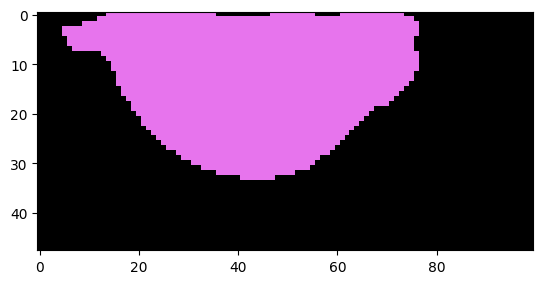

 78%|███████▊  | 7/9 [01:44<00:25, 12.90s/it]

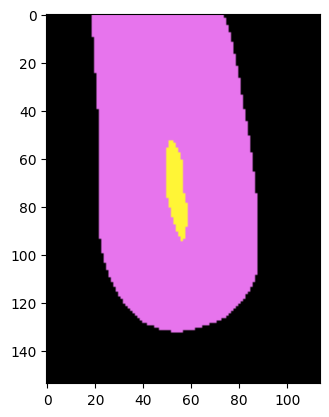

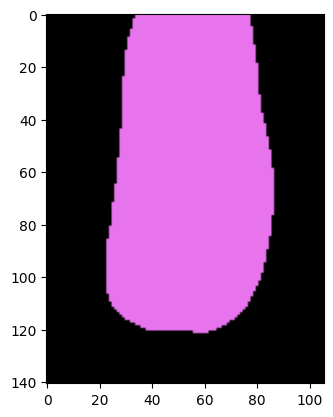

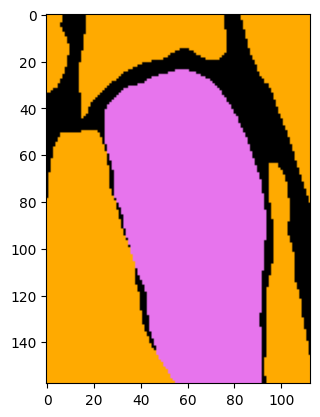

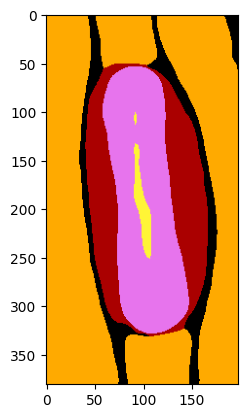

 89%|████████▉ | 8/9 [01:46<00:09,  9.46s/it]

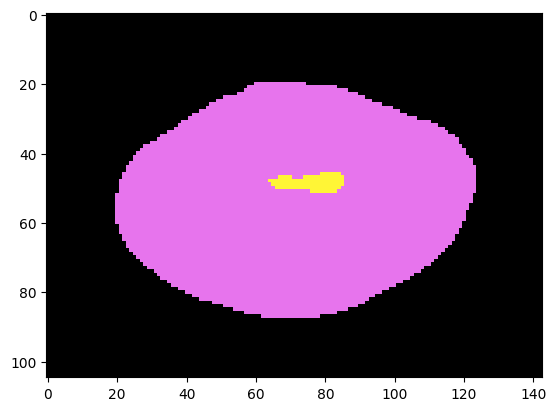

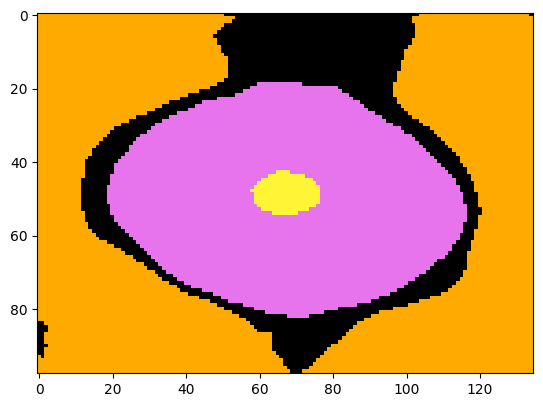

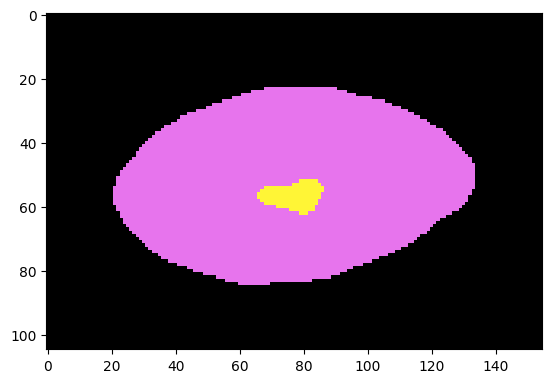

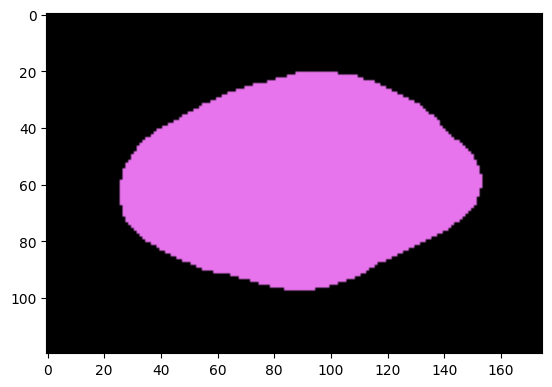

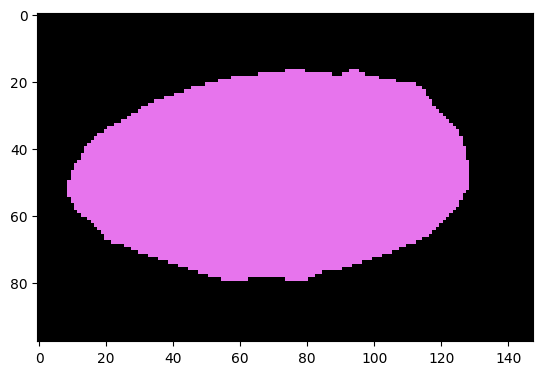

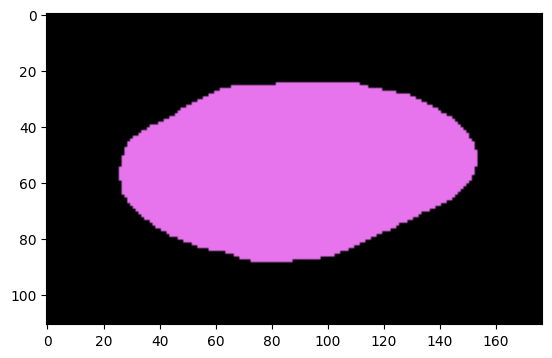

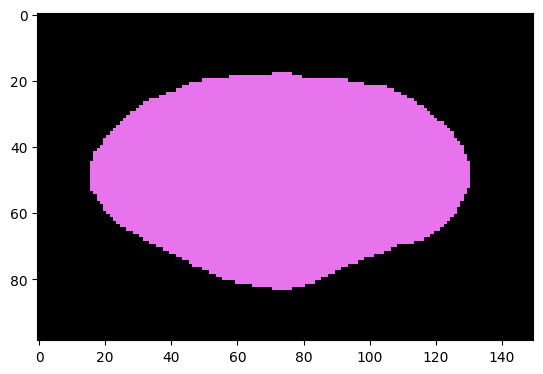

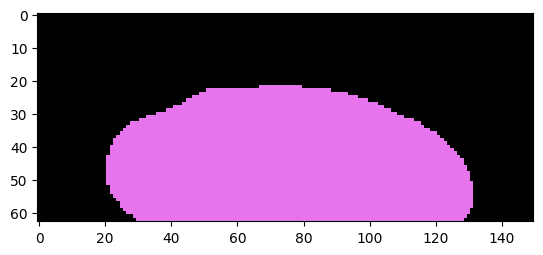

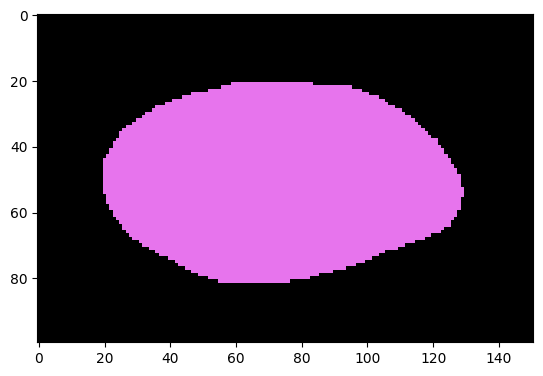

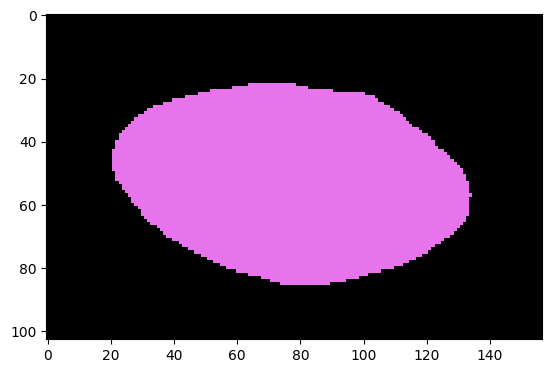

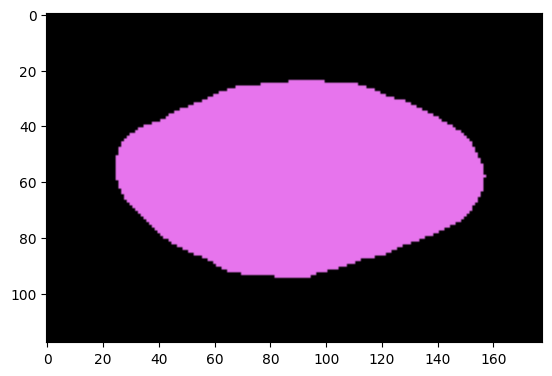

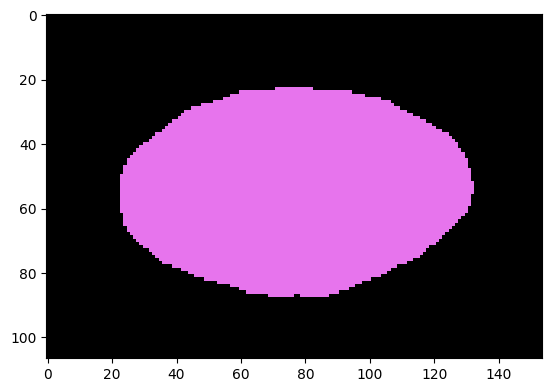

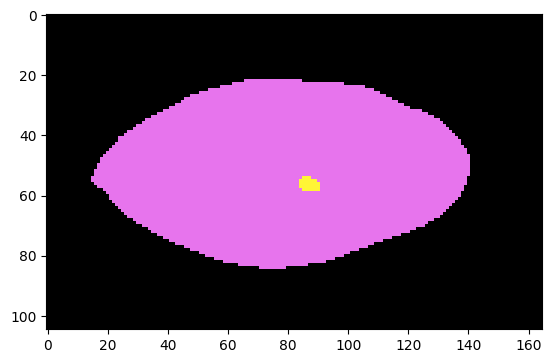

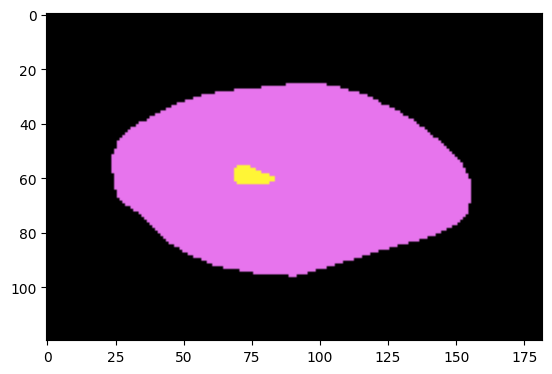

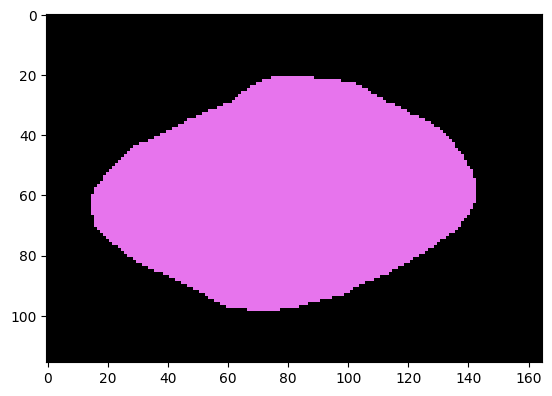

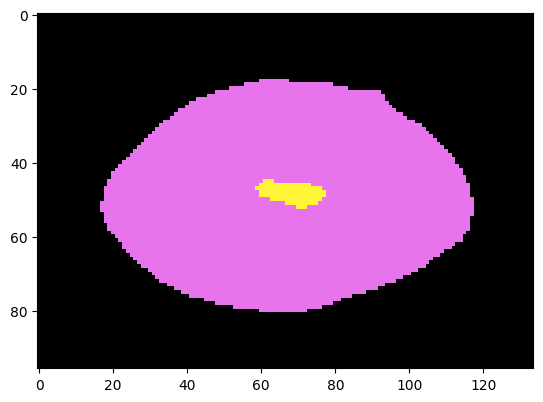

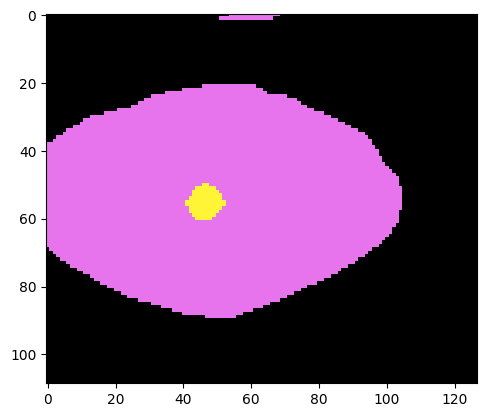

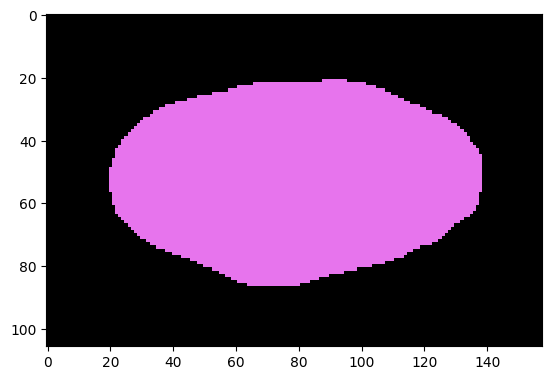

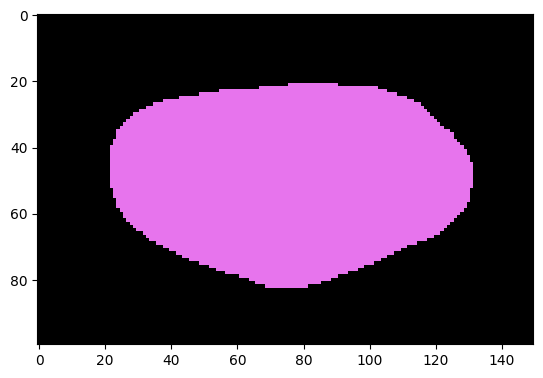

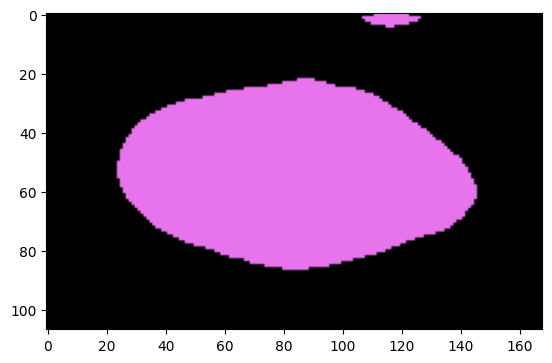

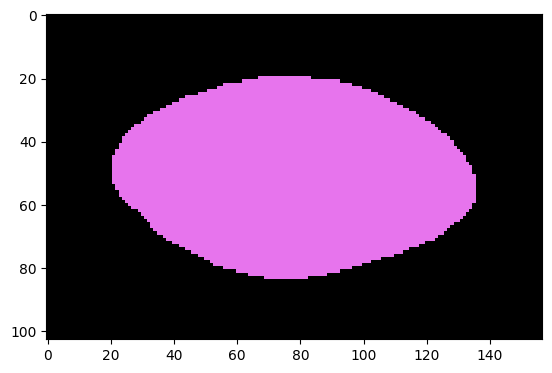

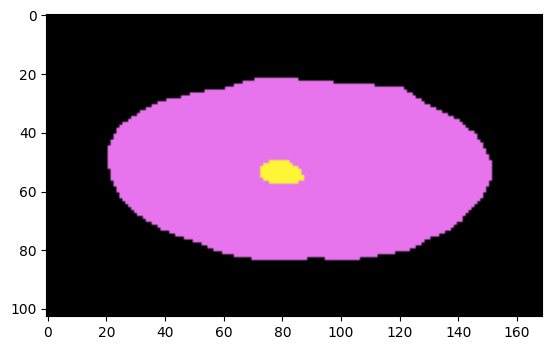

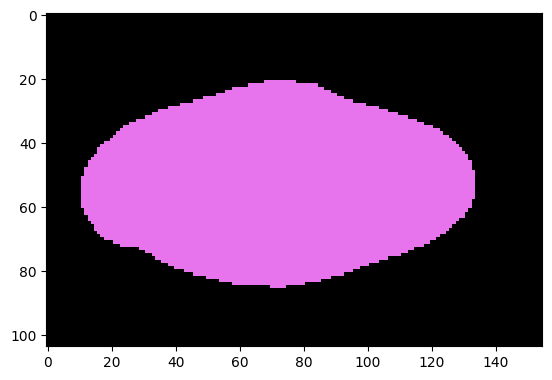

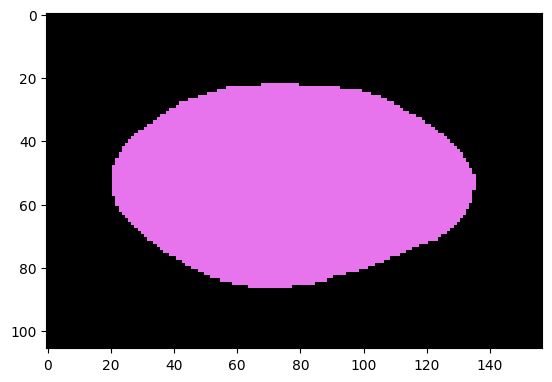

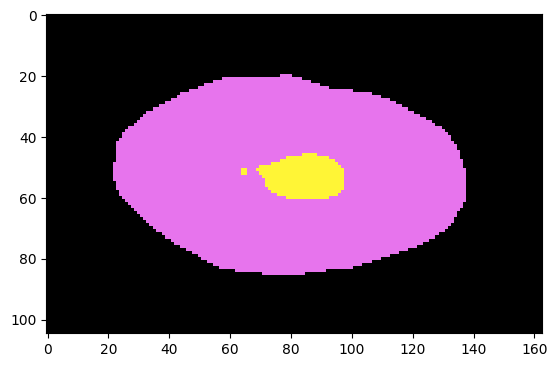

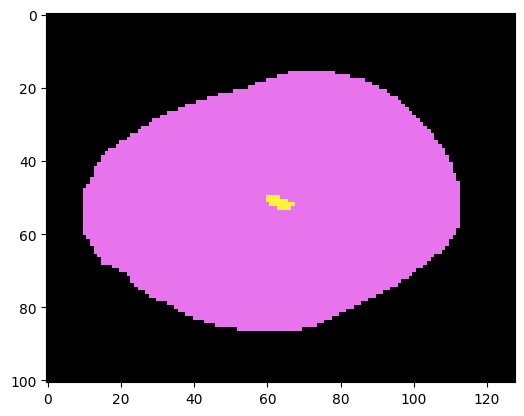

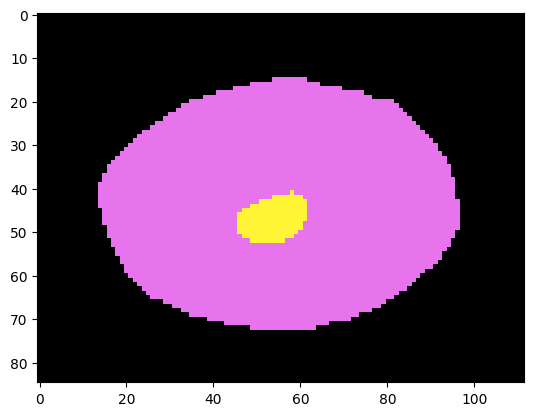

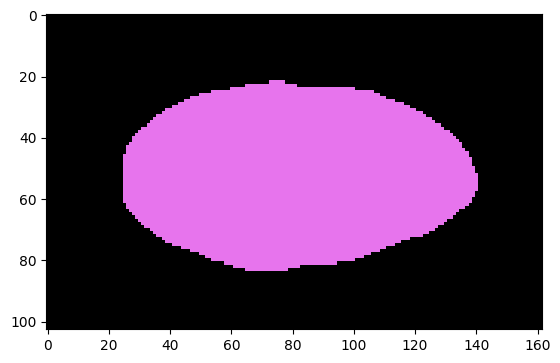

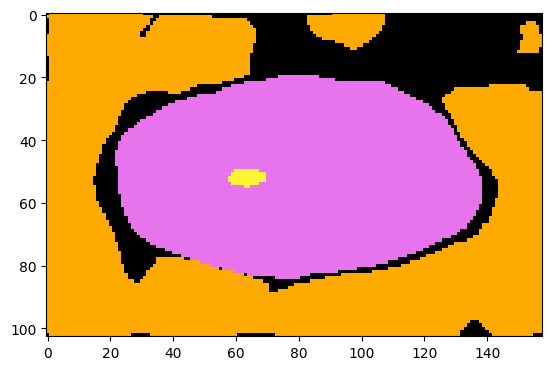

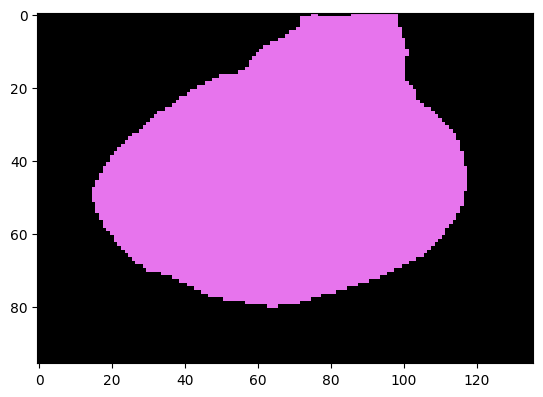

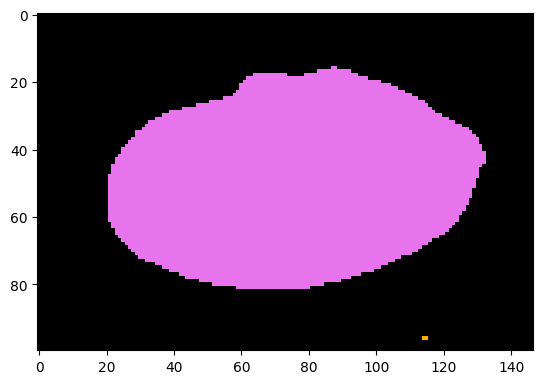

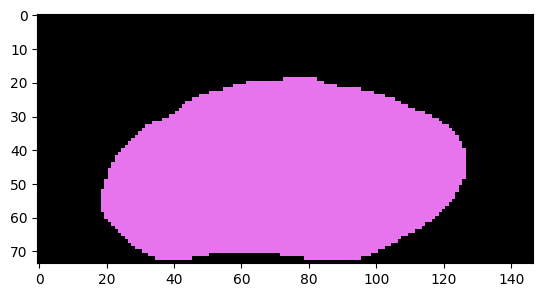

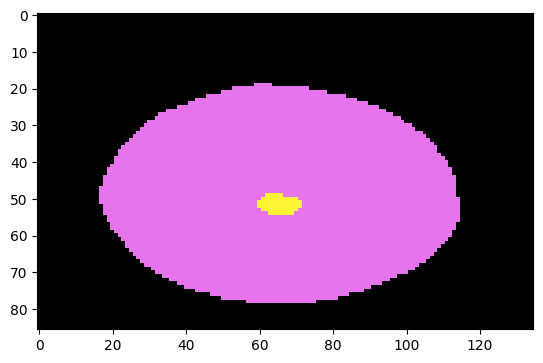

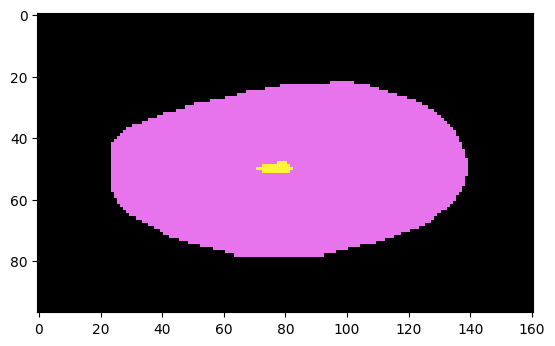

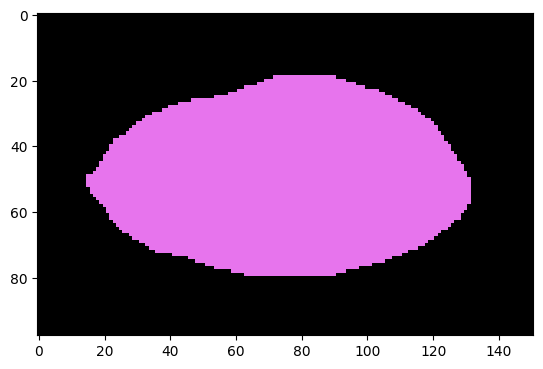

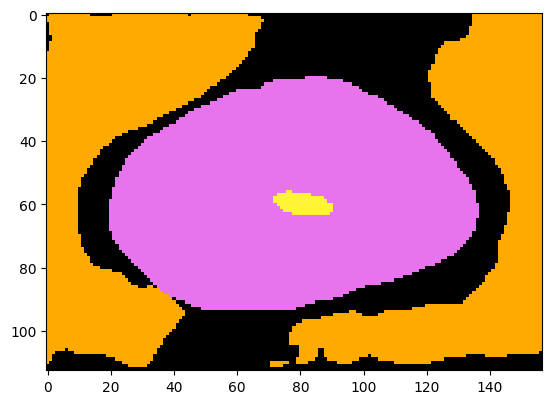

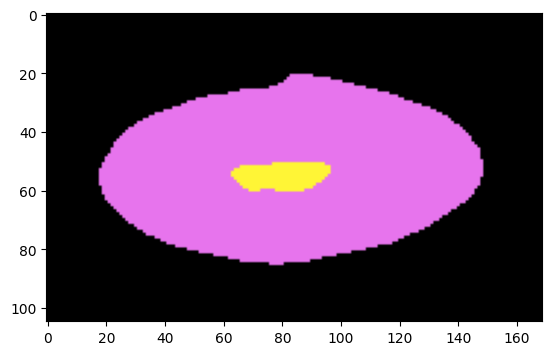

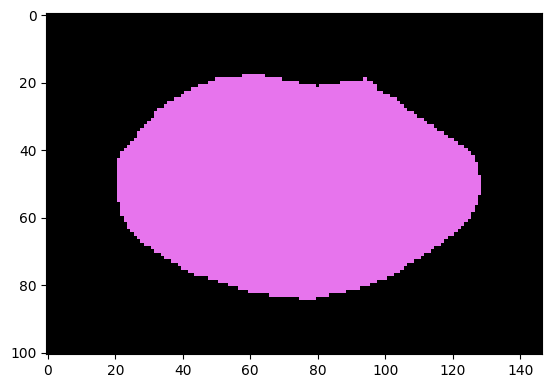

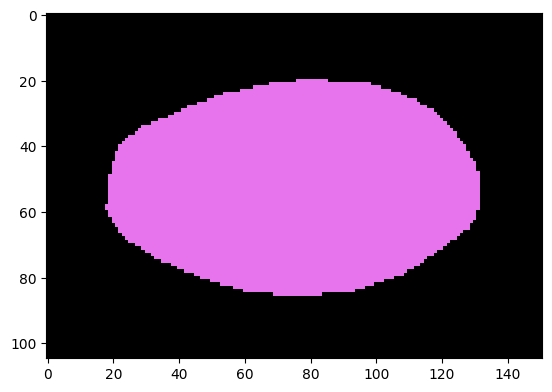

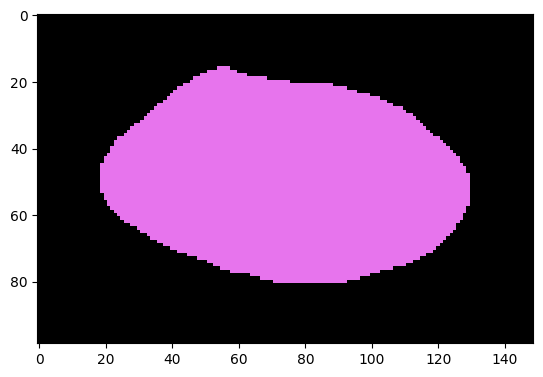

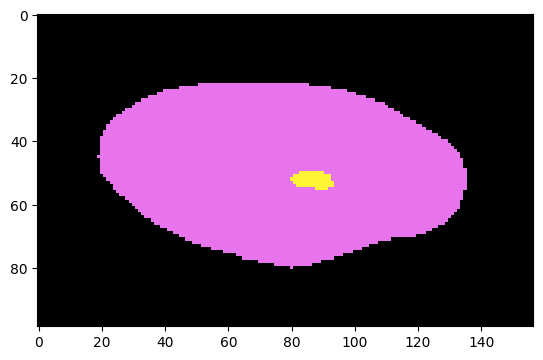

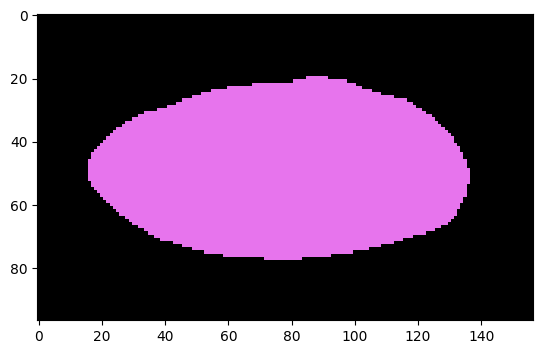

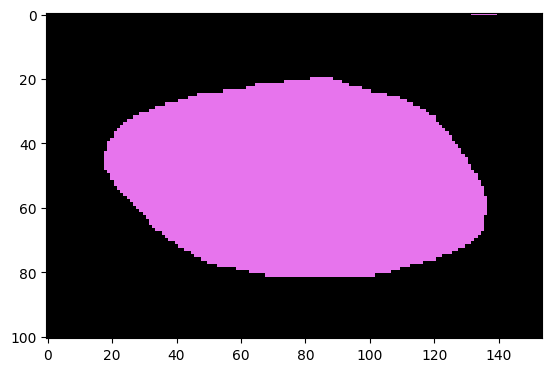

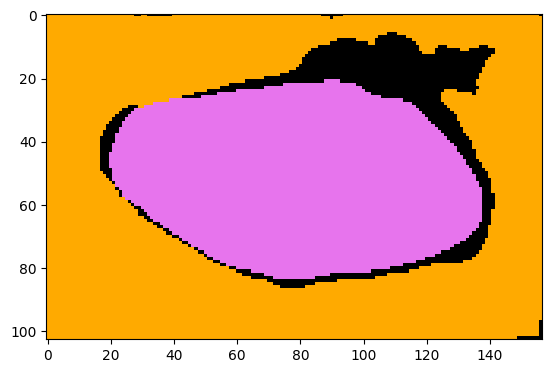

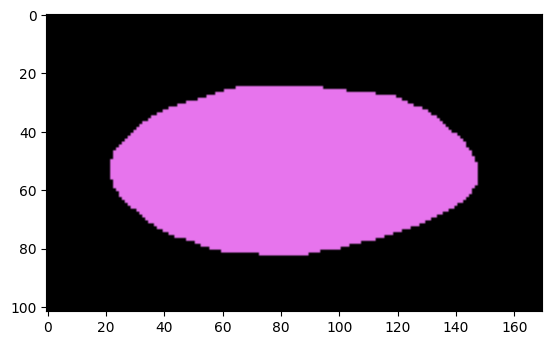

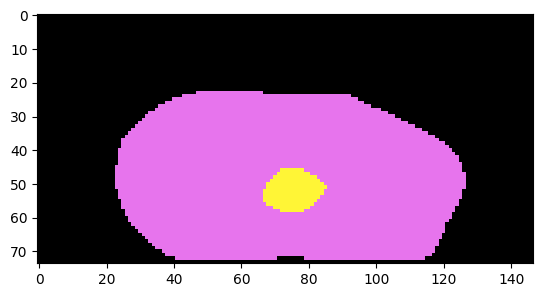

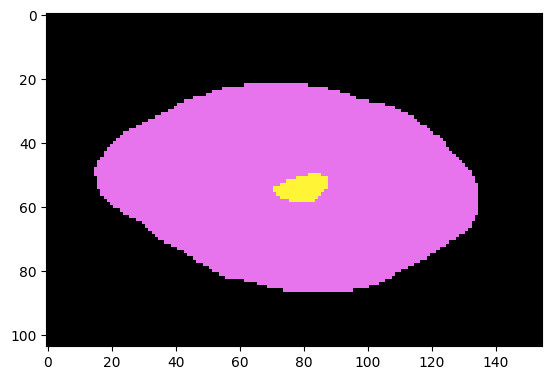

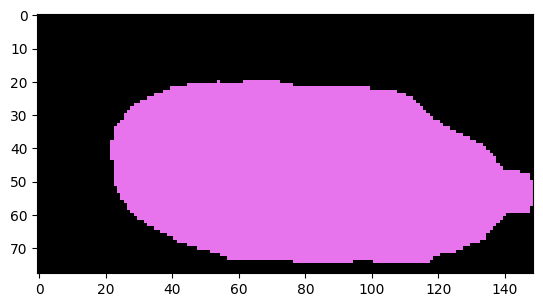

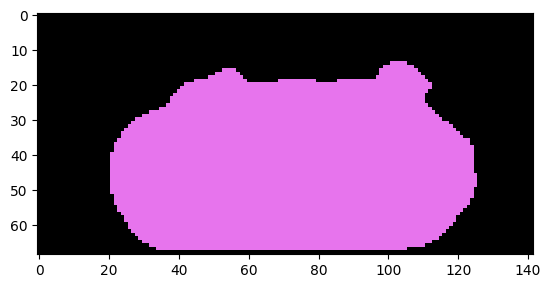

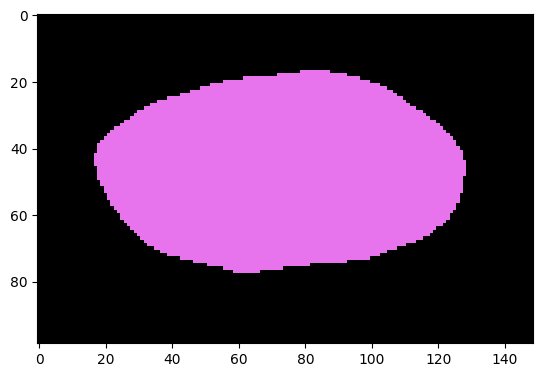

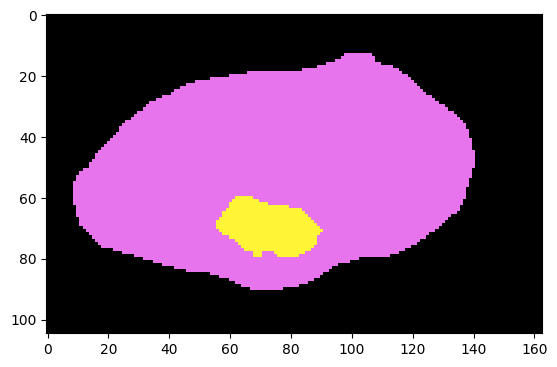

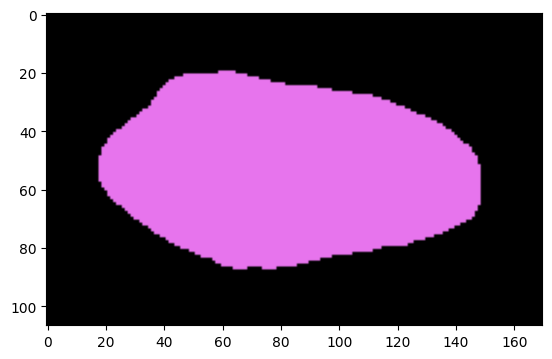

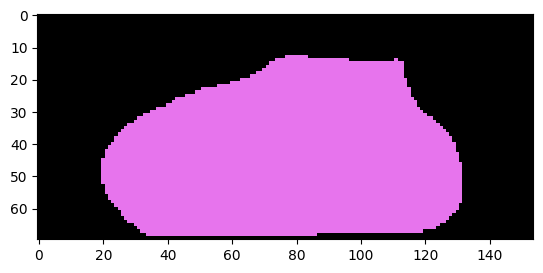

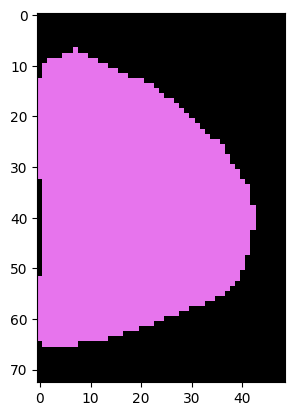

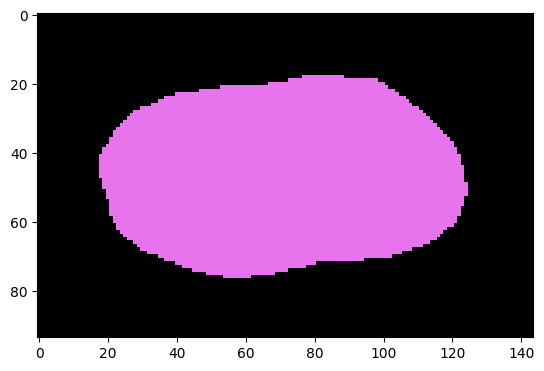

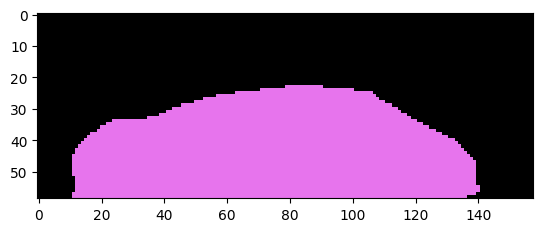

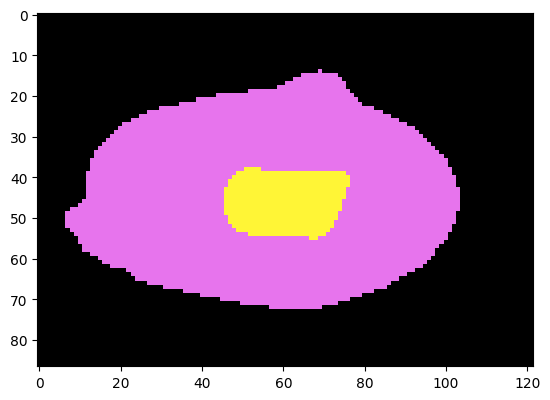

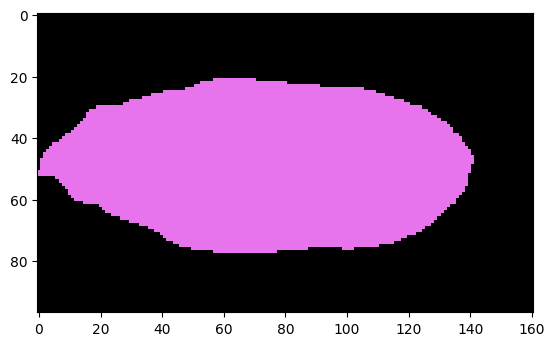

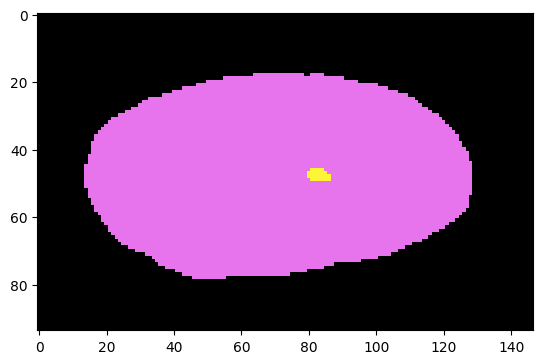

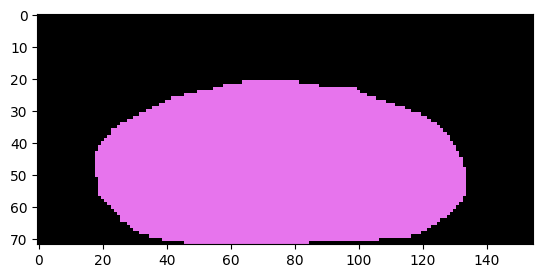

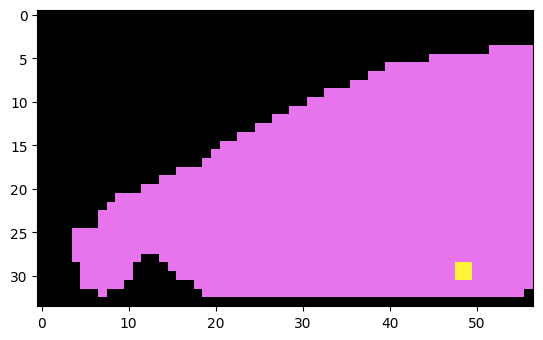

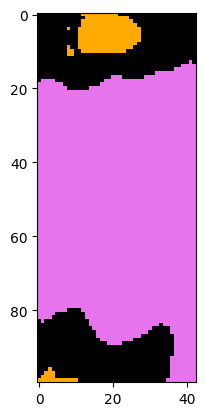

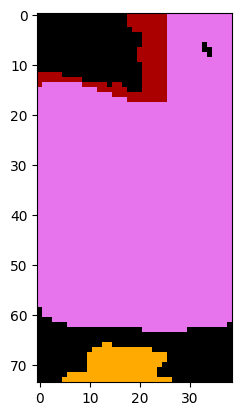

100%|██████████| 9/9 [02:18<00:00, 15.43s/it]


In [6]:
_ = models.segment_cell(json_paths, if_visualize=True, if_auto_label=True, resize_to=(2048, 2048))